In [2]:
# 📊 Basic data handling
import pandas as pd
import numpy as np

# 📈 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 🔍 Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 🧠 Machine Learning (for later phases)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 📏 Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# 🎯 Model Explainability (Phase 3)
import shap

# ⚠️ Warnings
import warnings
warnings.filterwarnings("ignore")

# 🖼️ Plot styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Only required for Streamlit App (later phase)
import streamlit as st


In [3]:
# ----------------------------------------
# Step 2: Load and Preview the Dataset
# ----------------------------------------

# 📥 Load dataset from CSV
df = pd.read_csv("C:/Users/arpit/IBM HR Analytics — Attrition & Performance Prediction with SHAP Insights/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# 🔎 Previewing the dataset

# Display the first 5 records
print("📌 First 5 Records:")
display(df.head())

# Display the last 5 records
print("\n📌 Last 5 Records:")
display(df.tail())

# 🧾 Basic structure and column info
print("\n📌 Dataset Info:")
df.info()

# 📊 Summary statistics for numerical features
print("\n📌 Descriptive Statistics:")
display(df.describe())

# ❗ Check for missing values
print("\n📌 Missing Values in Each Column:")
print(df.isnull().sum())

# 📏 Dataset dimensions
print("\n📌 Dataset Shape (rows, columns):", df.shape)

# 🔁 Check for duplicates
print("\n📌 Number of Duplicate Records:", df.duplicated().sum())


📌 First 5 Records:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



📌 Last 5 Records:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2



📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLeve

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000



📌 Missing Values in Each Column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsI

In [4]:
# ----------------------------------------
# Step 3.1: Initial Data Cleaning Checks
# ----------------------------------------

# Re-verify missing values (just to be sure)
print("📌 Re-checking for missing values:")
print(df.isnull().sum())

# Check for any unexpected or unique values in categorical columns that might need attention
categorical_cols = df.select_dtypes(include='object').columns
print("\n📌 Unique values in categorical columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())

📌 Re-checking for missing values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsI

In [5]:
# ----------------------------------------
# Step 3.2: Feature Understanding
# ----------------------------------------

print("\n📌 Data Types of Each Column:")
print(df.dtypes)

print("\n📌 Summary of Categorical Columns:")
print(categorical_cols)

print("\n📌 Summary of Numerical Columns:")
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_cols)

# Let's take a closer look at some potentially less obvious numerical features
print("\n📌 Unique values in some numerical columns:")
print(f"EmployeeCount: {df['EmployeeCount'].unique()}")
print(f"StandardHours: {df['StandardHours'].unique()}")
print(f"EmployeeNumber: {df['EmployeeNumber'].unique()}")


📌 Data Types of Each Column:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel         

In [6]:
# ----------------------------------------
# Step 3.3: Dropping Unnecessary Columns
# ----------------------------------------

columns_to_drop = ['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18']
df = df.drop(columns=columns_to_drop)

print("\n📌 DataFrame shape after dropping columns:", df.shape)
print("\n📌 Updated list of columns:")
print(df.columns)


📌 DataFrame shape after dropping columns: (1470, 31)

📌 Updated list of columns:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [7]:
# ----------------------------------------
# Step 3.4: Handling Categorical Features
# ----------------------------------------

# 1. Label Encoding for Binary Categorical Features
label_encoder = LabelEncoder()

df['Attrition'] = label_encoder.fit_transform(df['Attrition'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])

print("📌 Binary categorical features after Label Encoding:")
print(df[['Attrition', 'Gender', 'OverTime']].head())

# 2. One-Hot Encoding for Nominal Categorical Features
nominal_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True) # drop_first=True to avoid multicollinearity

print("\n📌 DataFrame shape after One-Hot Encoding:", df.shape)
print("\n📌 First 5 rows after One-Hot Encoding:")
display(df.head())

📌 Binary categorical features after Label Encoding:
   Attrition  Gender  OverTime
0          1       0         1
1          0       1         0
2          1       1         1
3          0       0         1
4          0       1         0

📌 DataFrame shape after One-Hot Encoding: (1470, 45)

📌 First 5 rows after One-Hot Encoding:


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,3,1,61,2,2,...,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,...,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,...,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,...,False,True,False,False,False,False,False,False,True,False


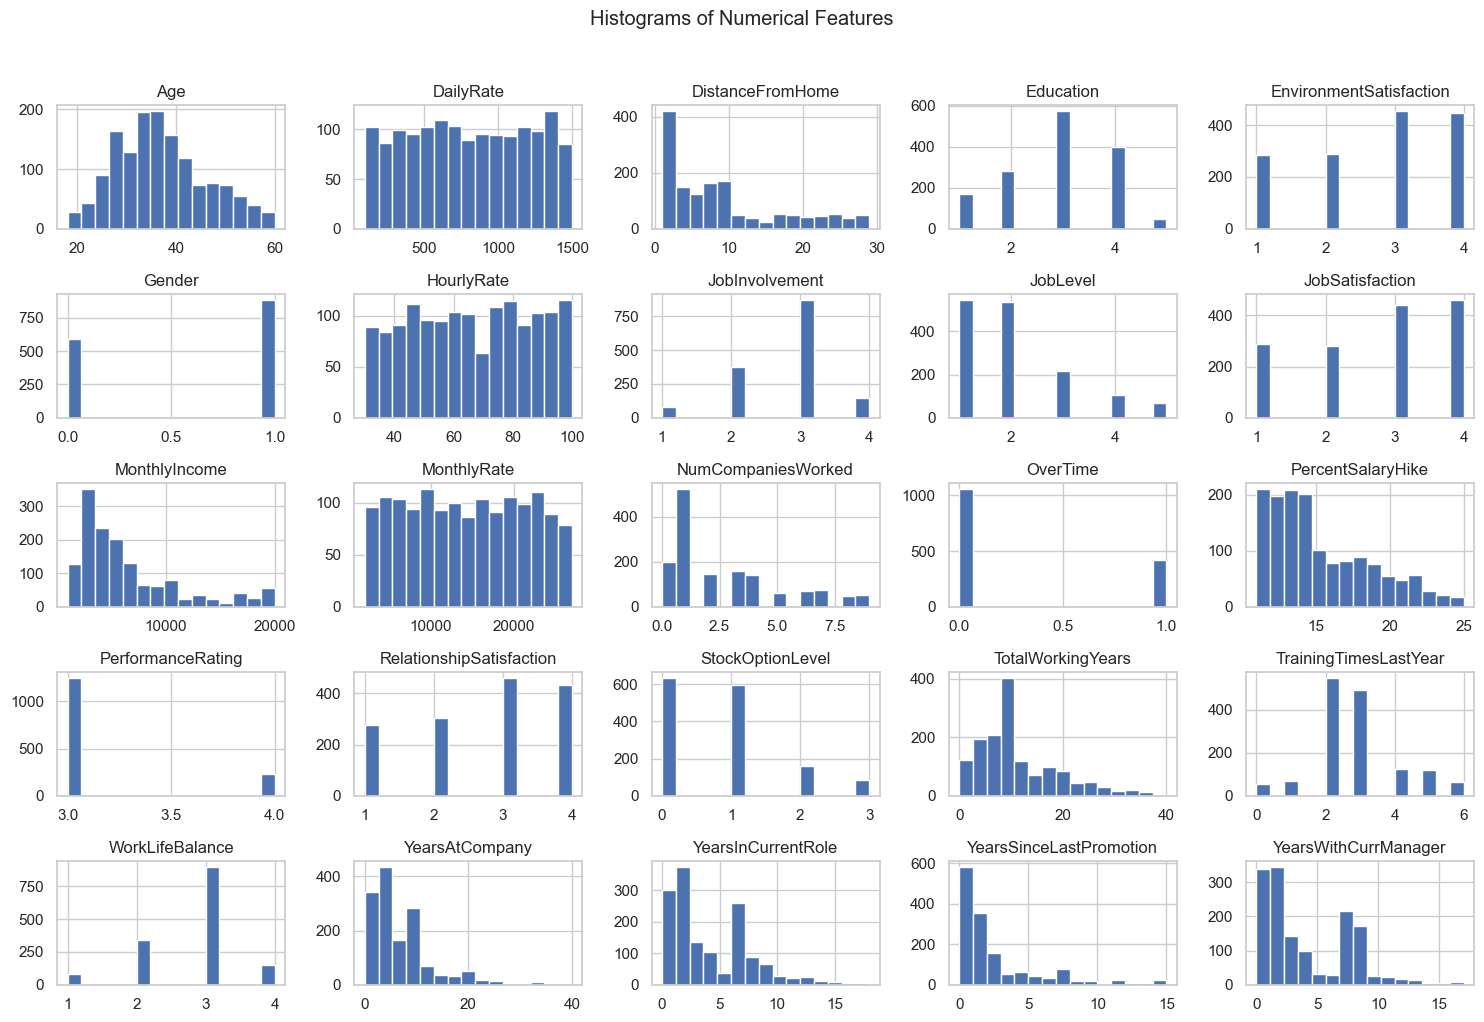

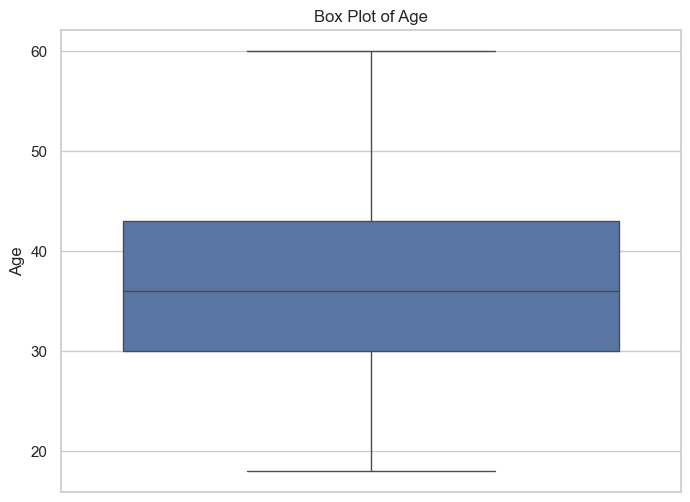

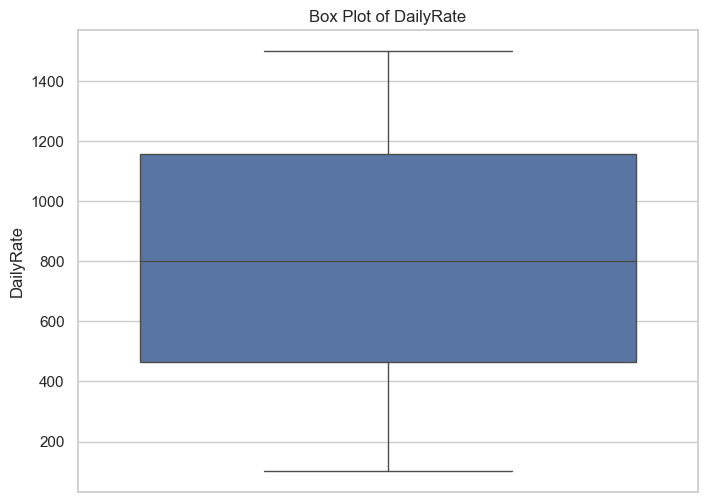

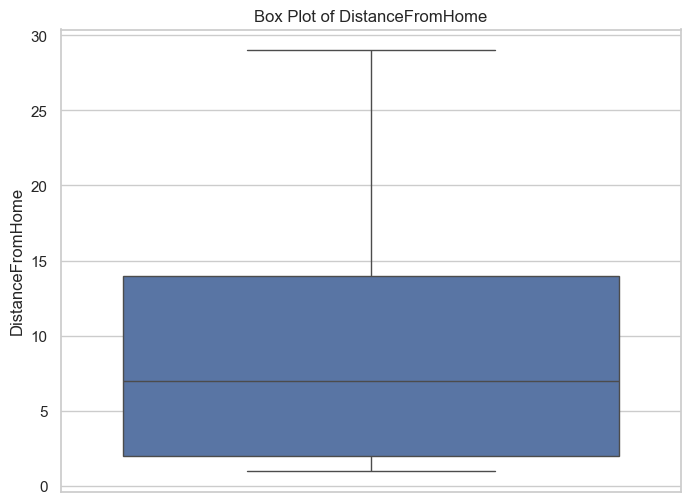

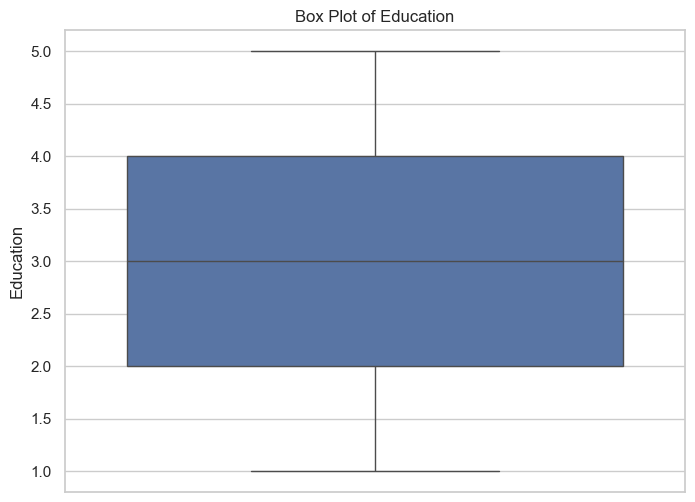

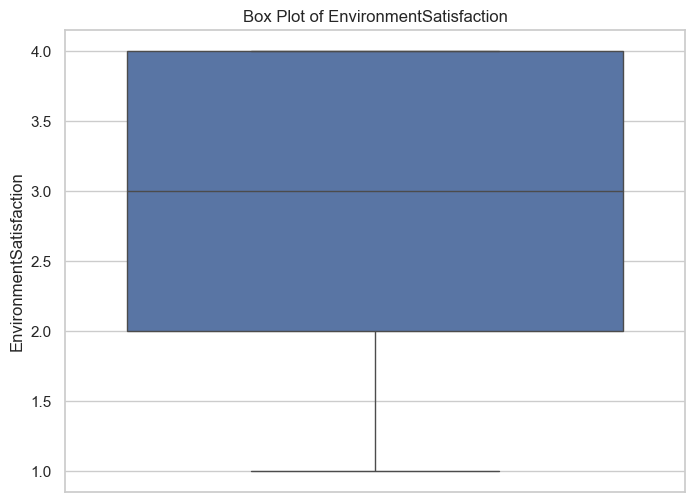

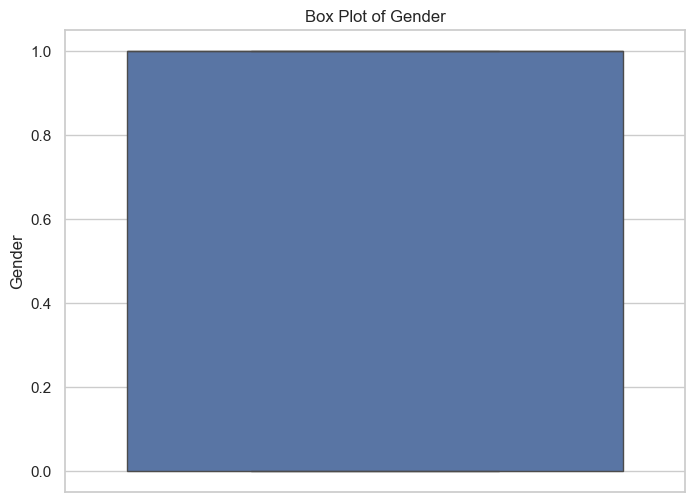

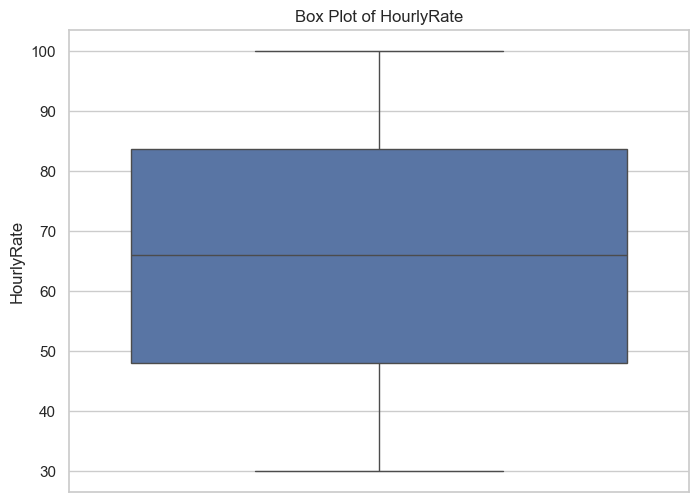

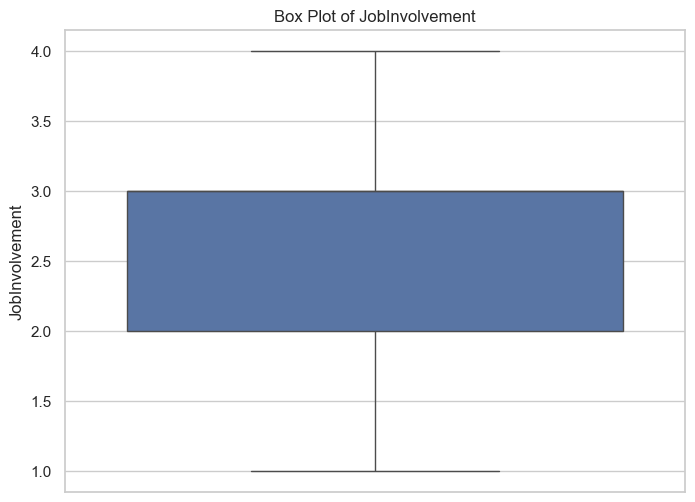

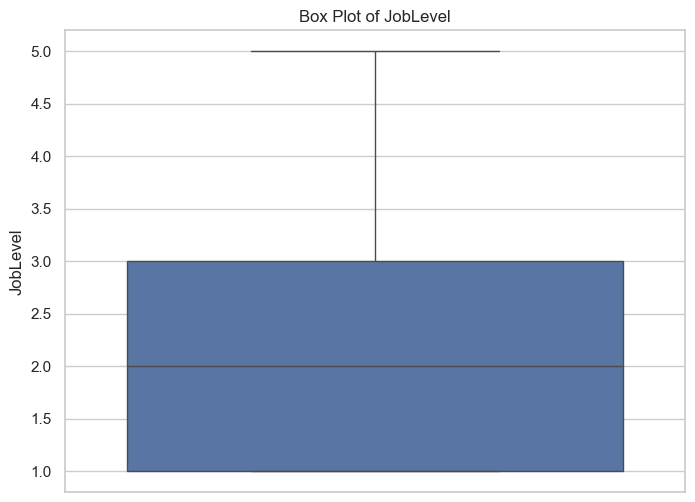

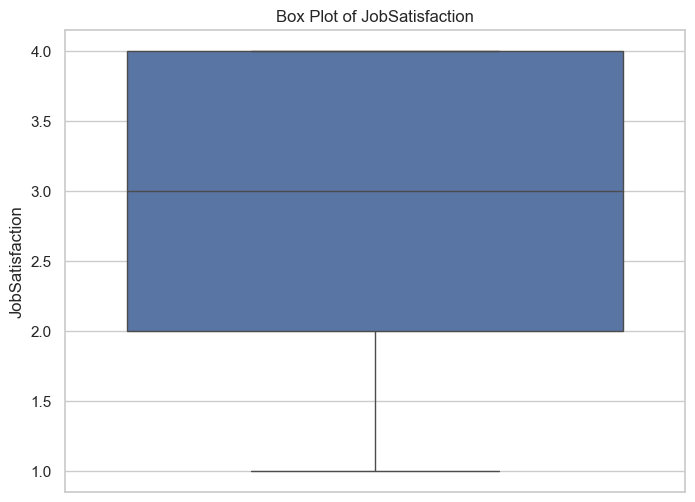

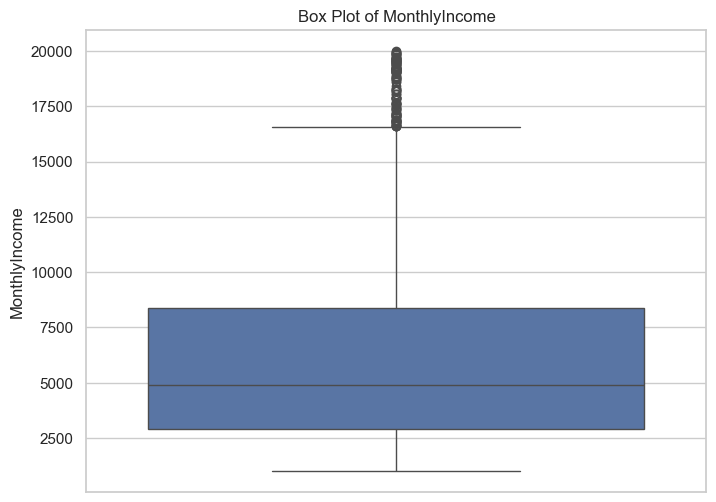

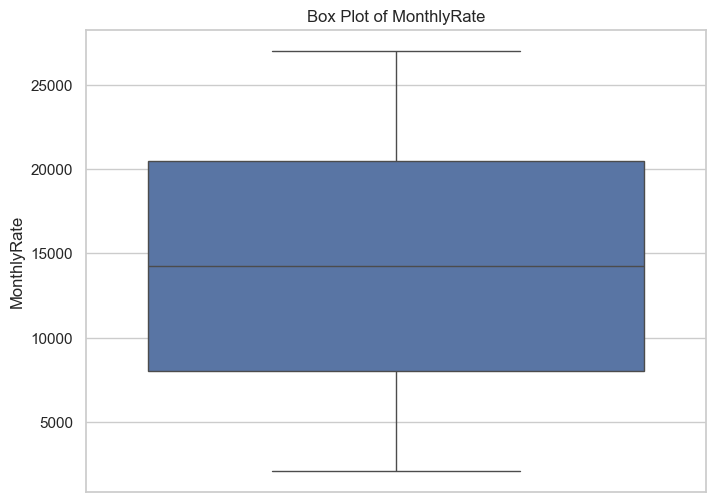

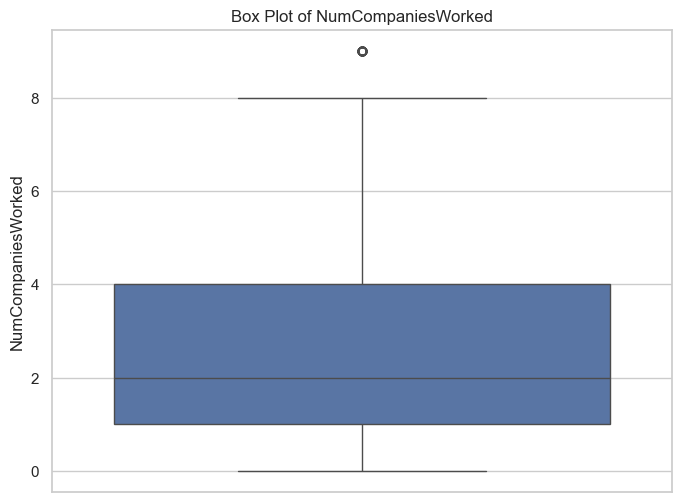

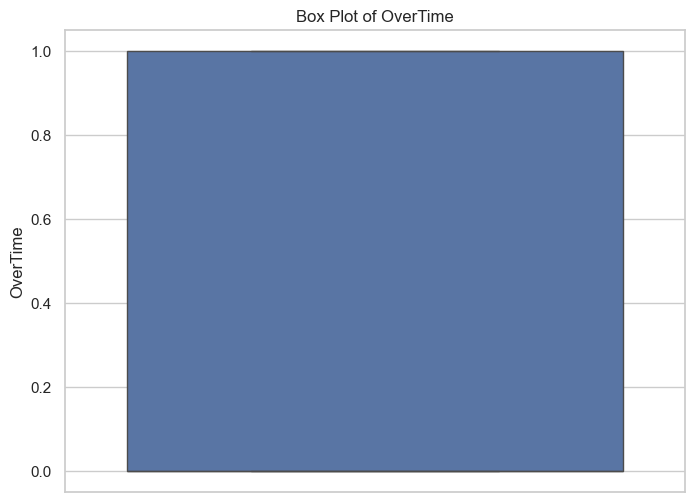

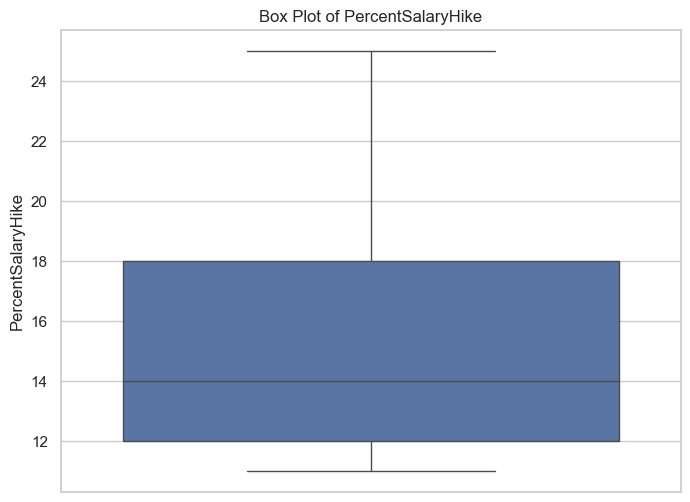

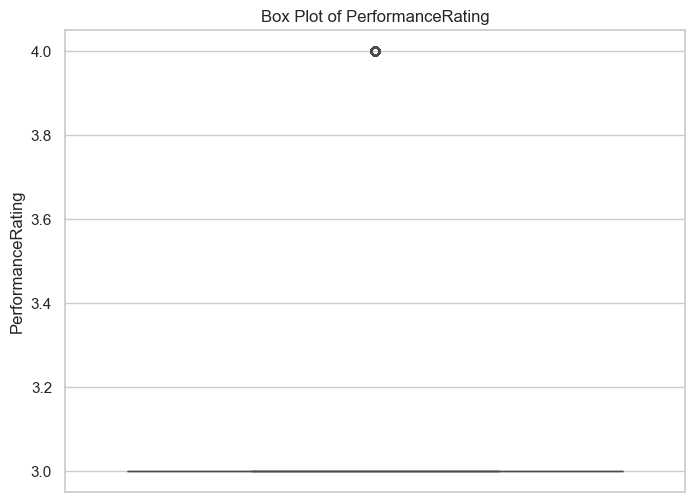

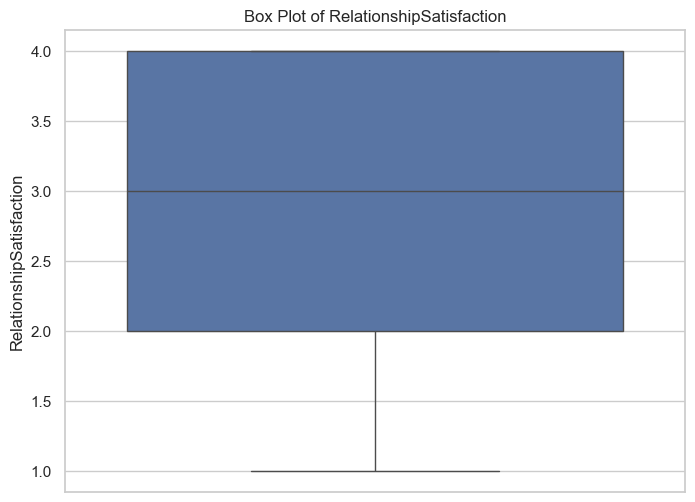

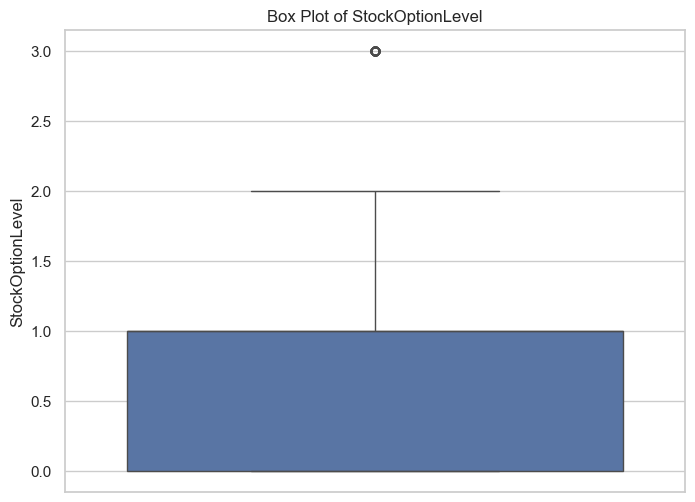

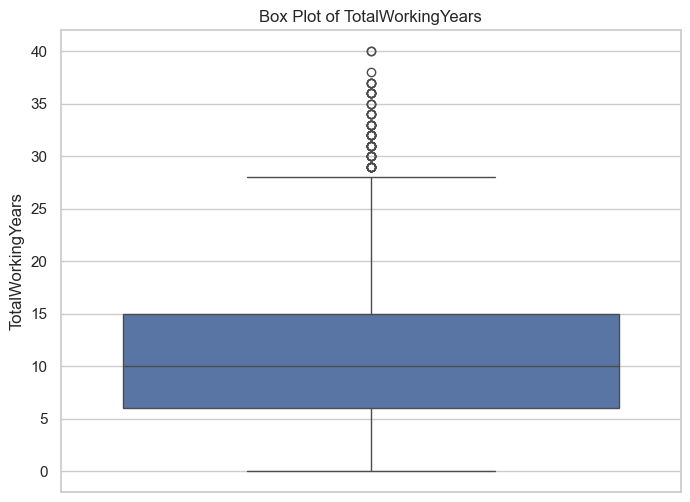

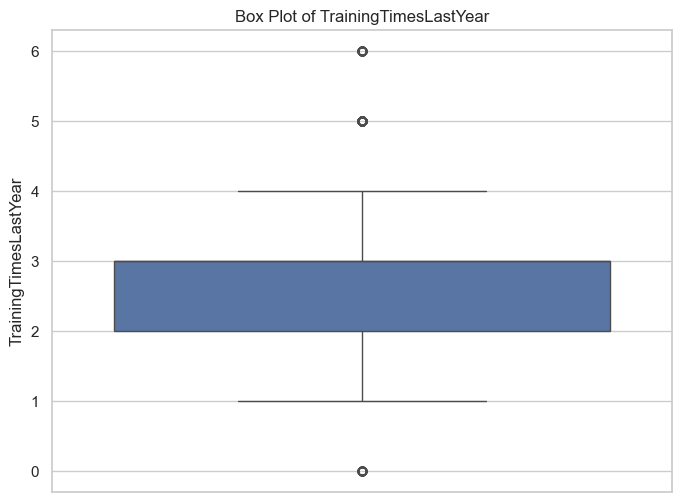

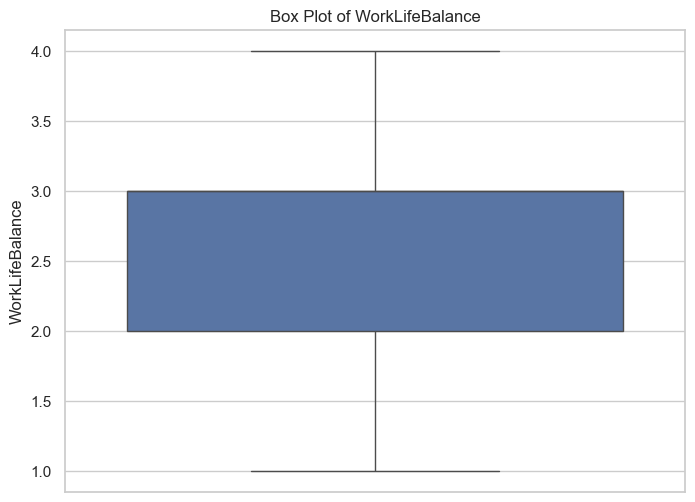

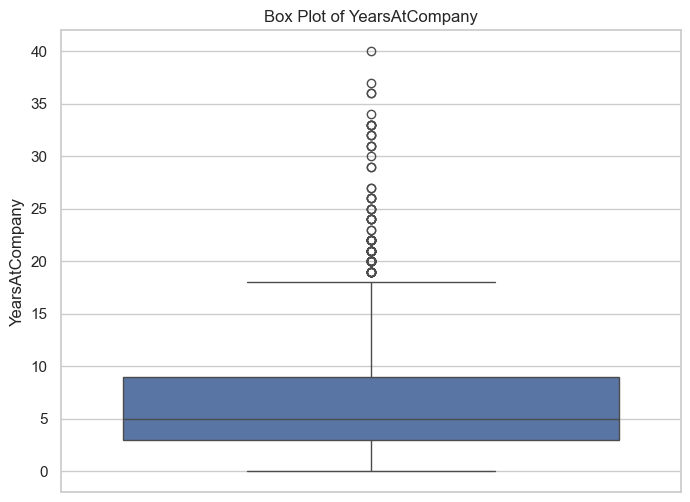

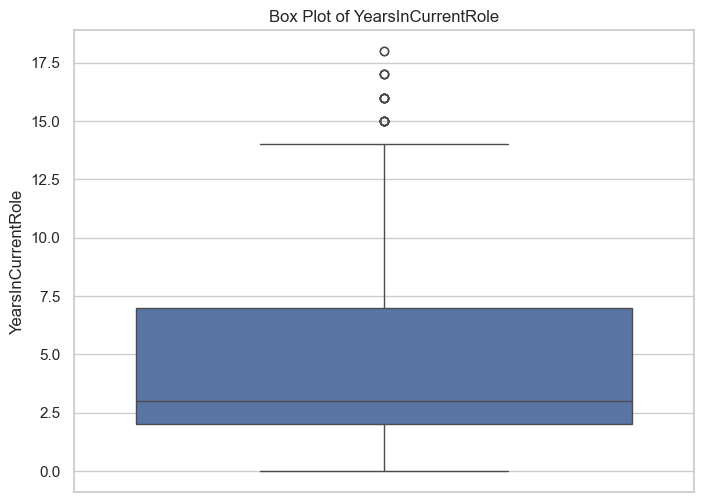

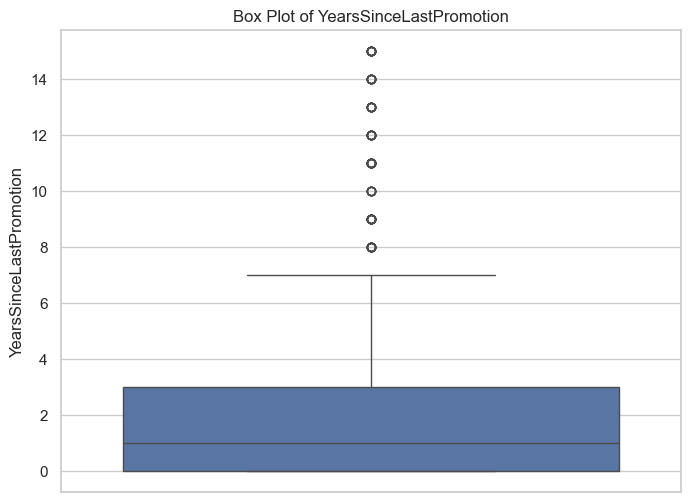

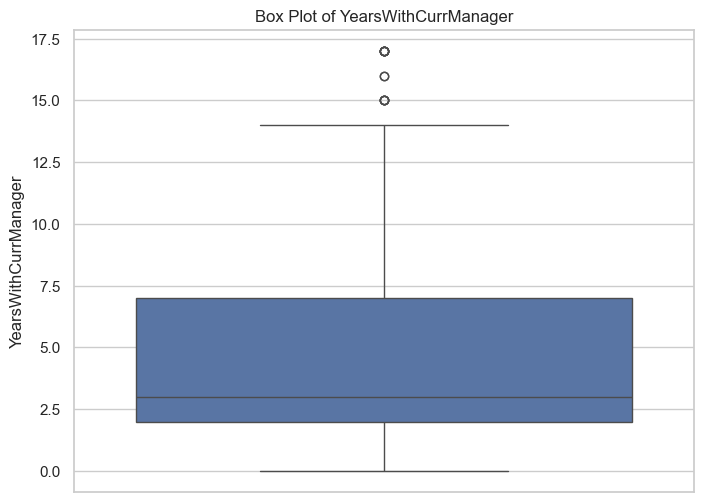

In [8]:
# ----------------------------------------
# Step 4.6.1: Univariate Analysis - Numerical Features
# ----------------------------------------

numerical_cols_eda = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_eda.remove('Attrition') # Don't want to see distribution of the target here

df[numerical_cols_eda].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

for col in numerical_cols_eda:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

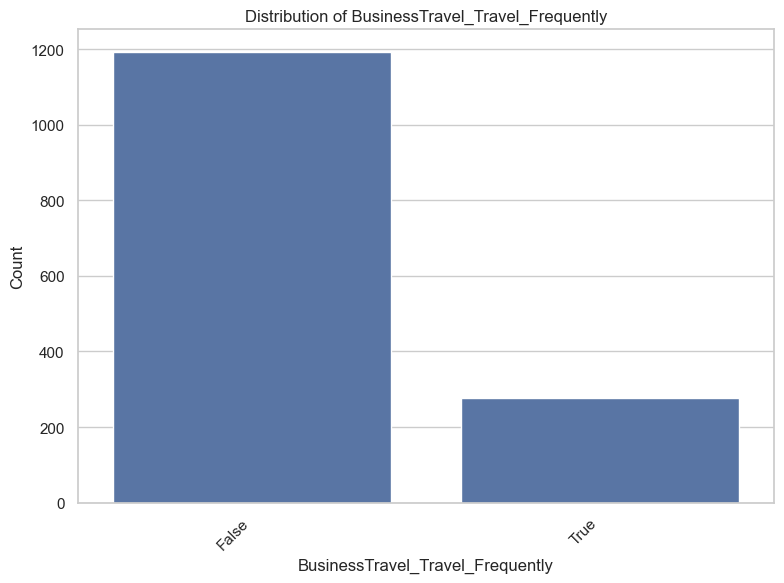

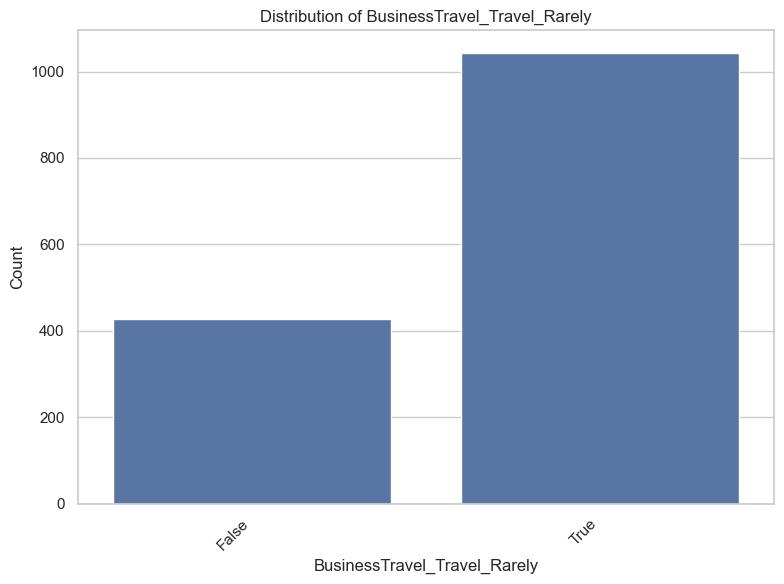

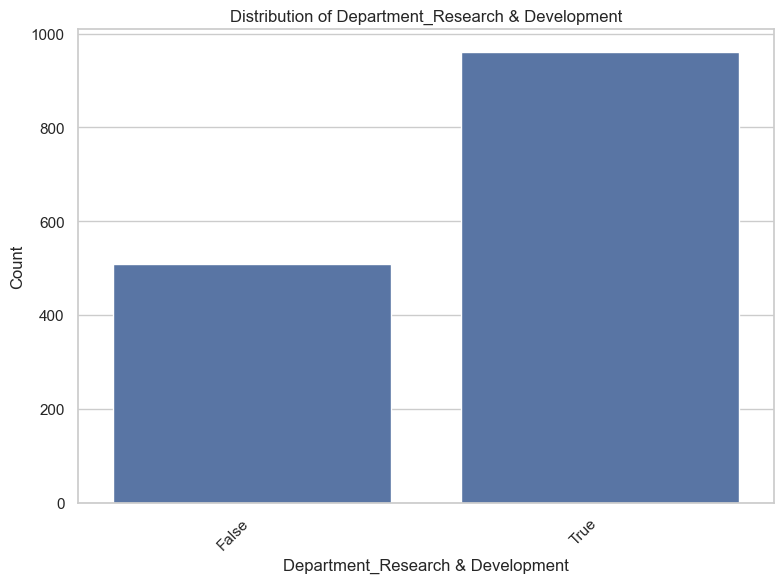

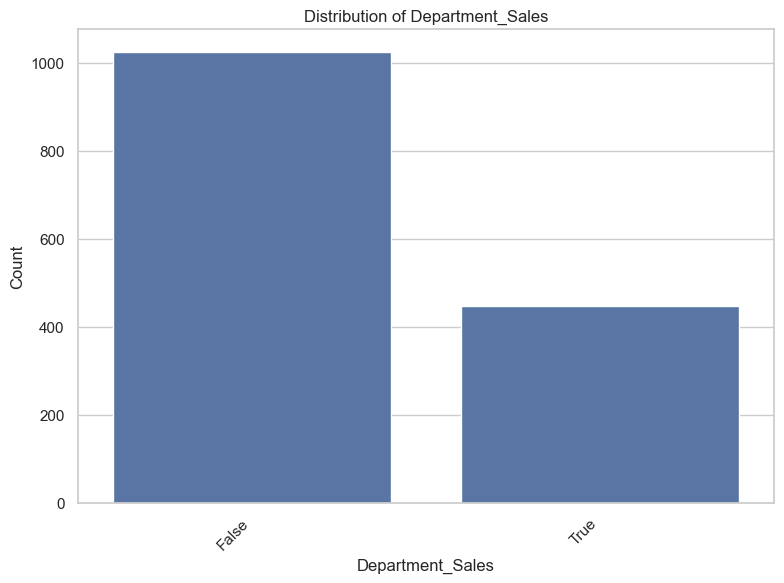

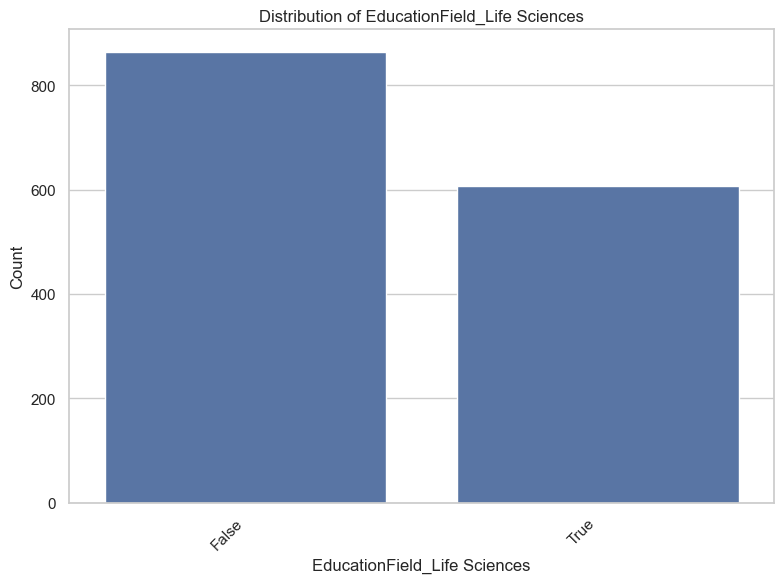

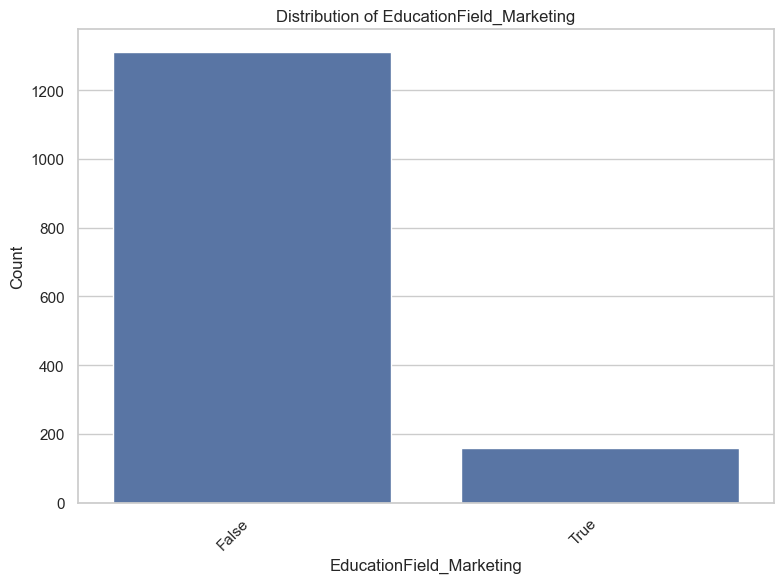

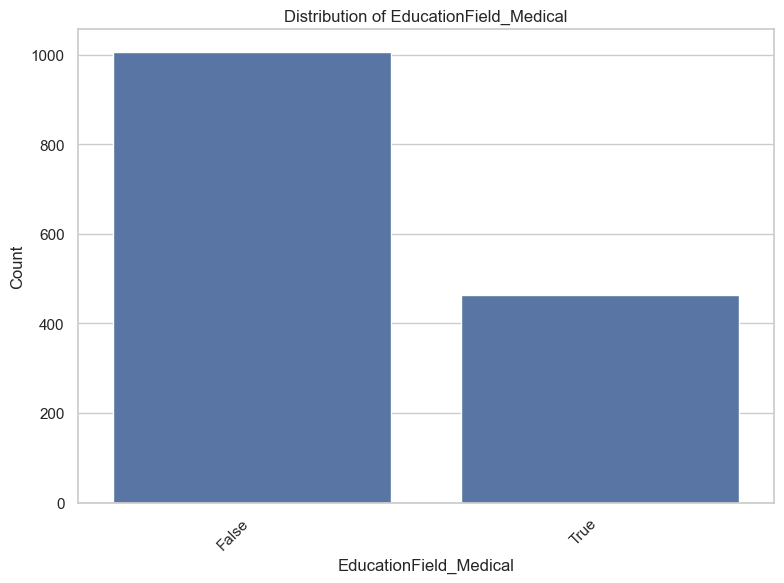

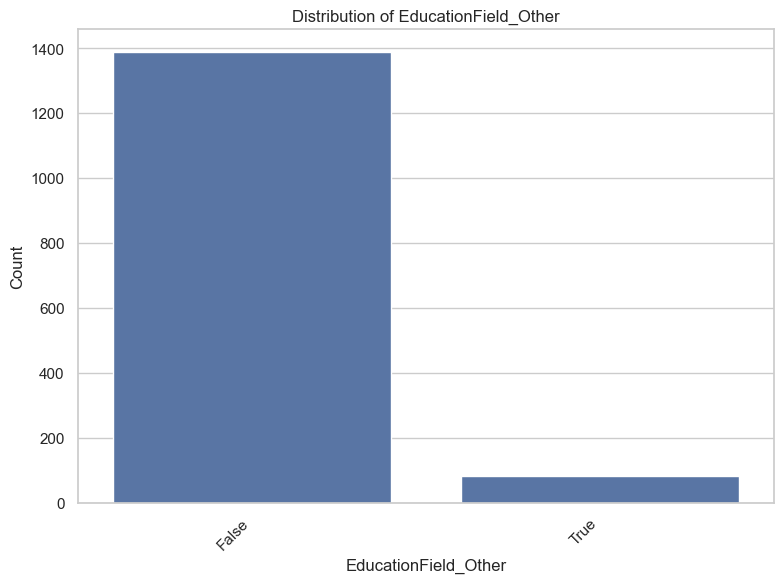

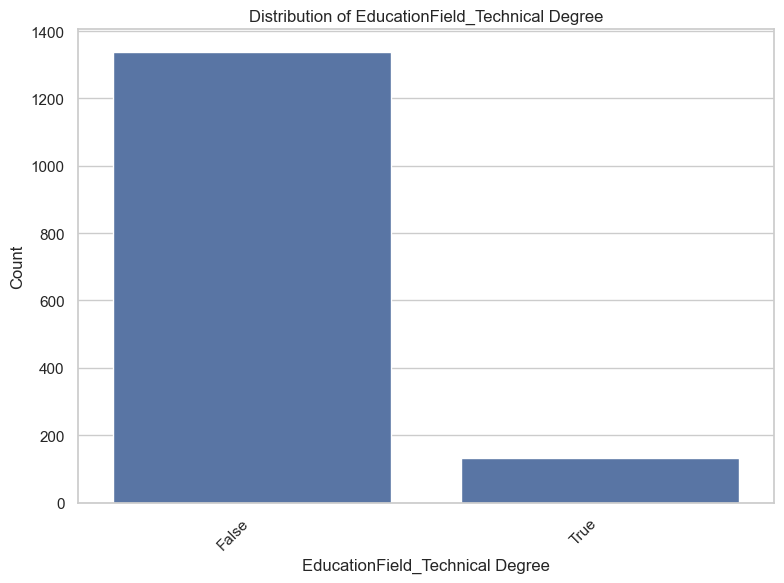

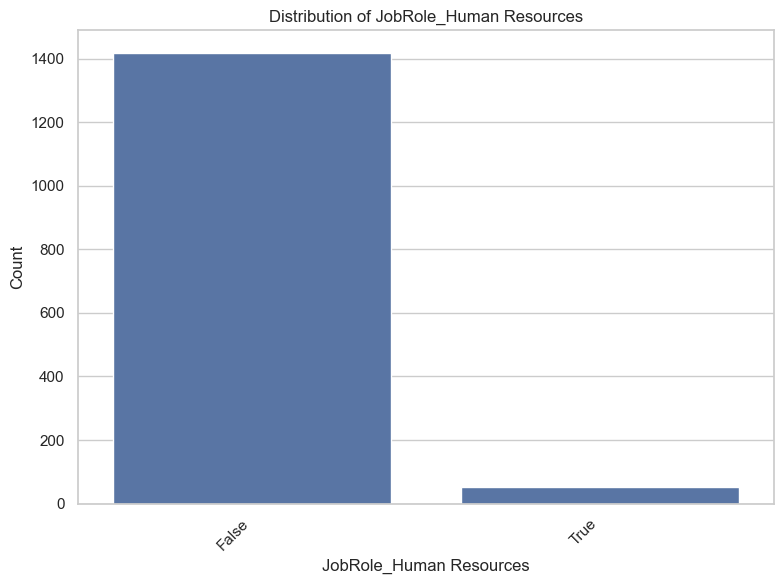

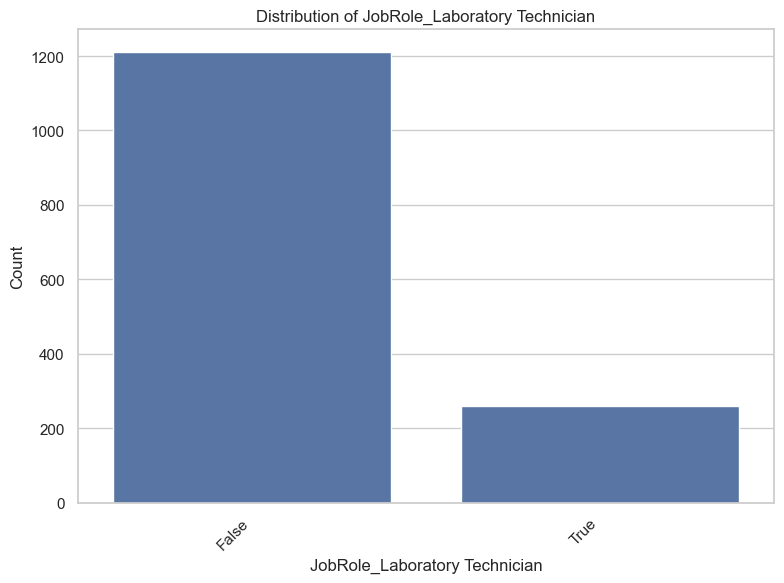

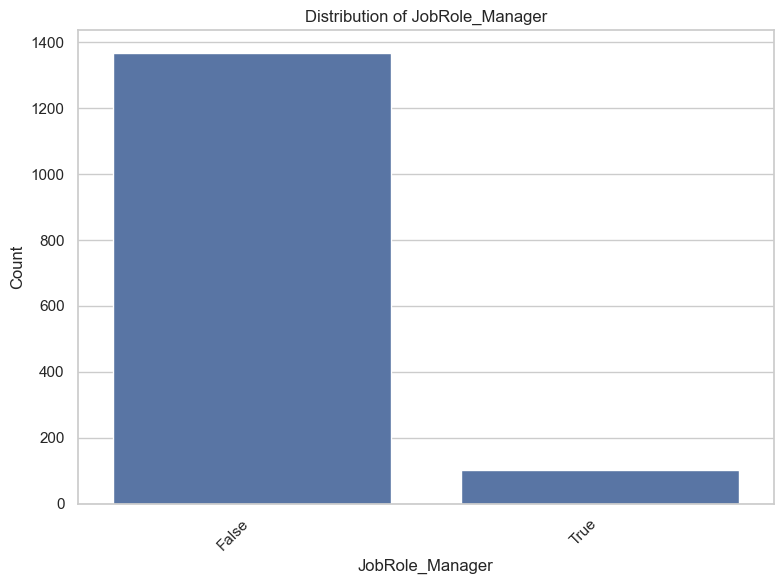

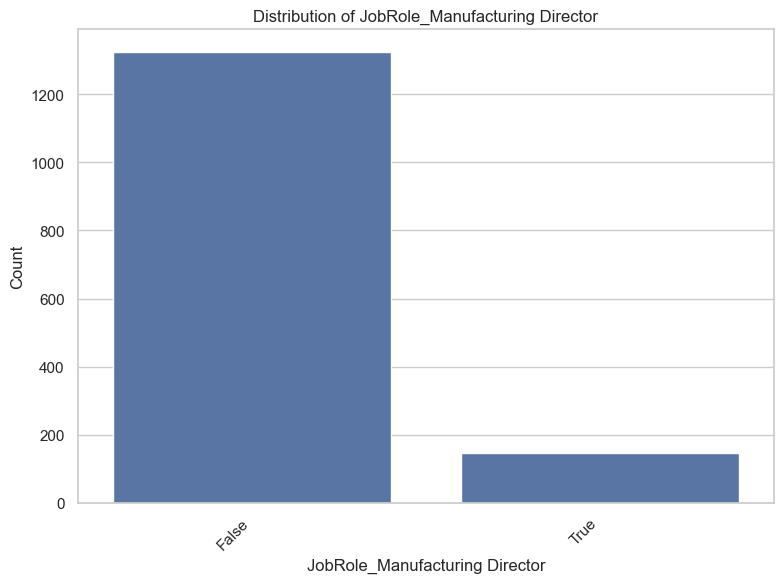

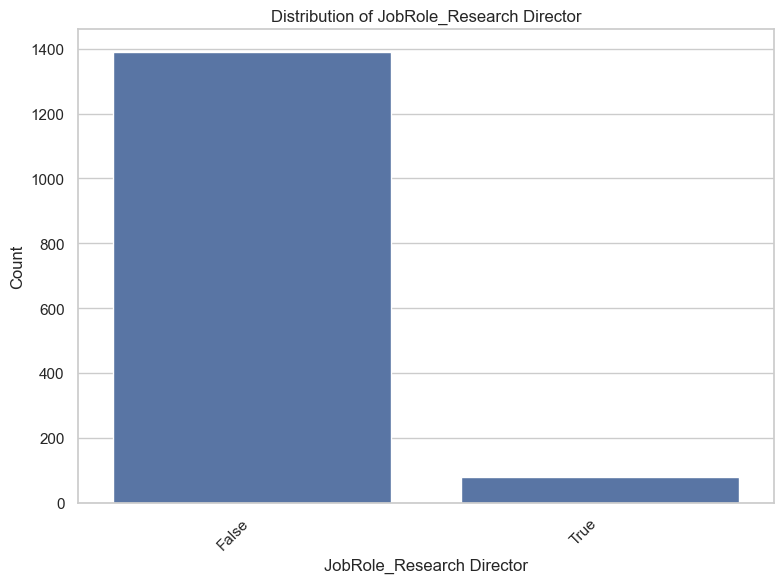

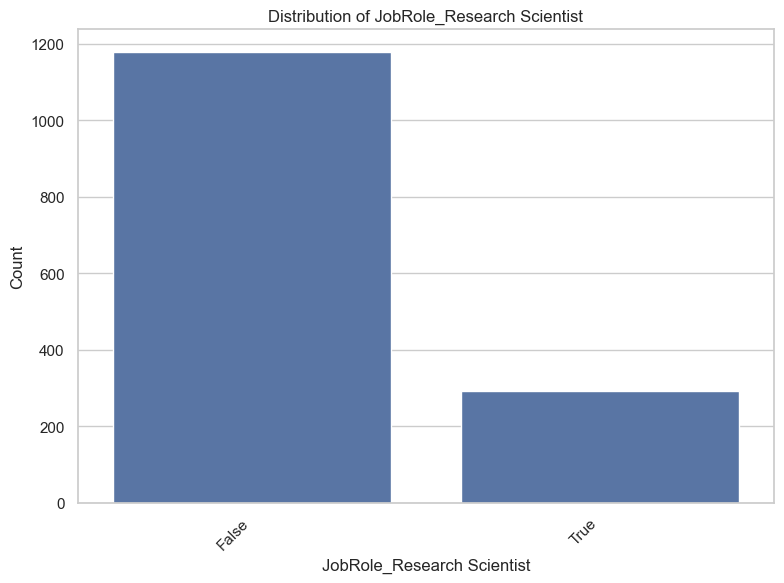

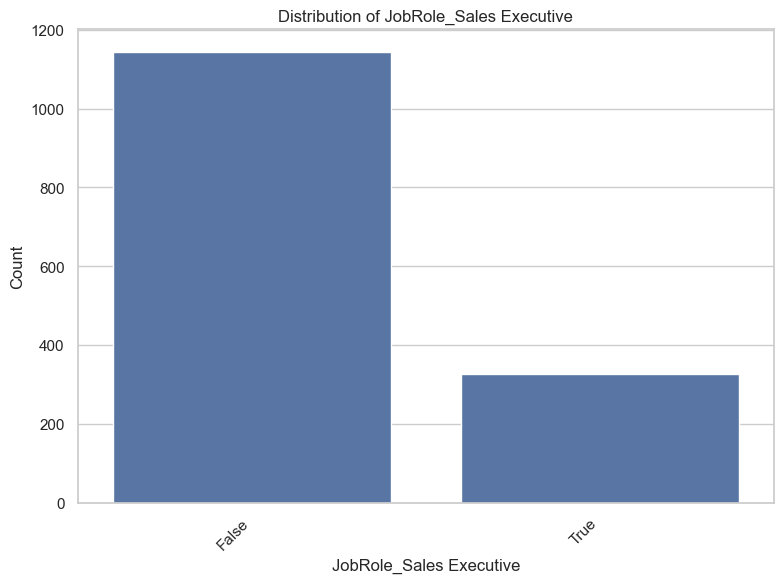

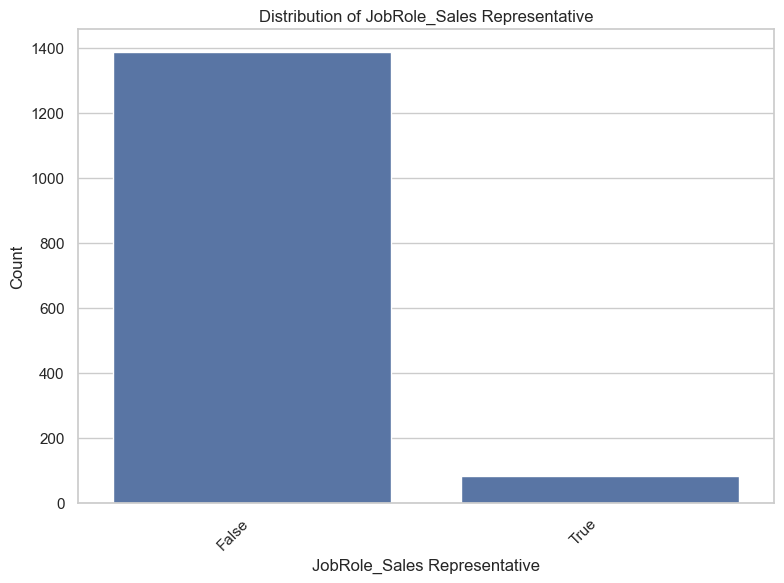

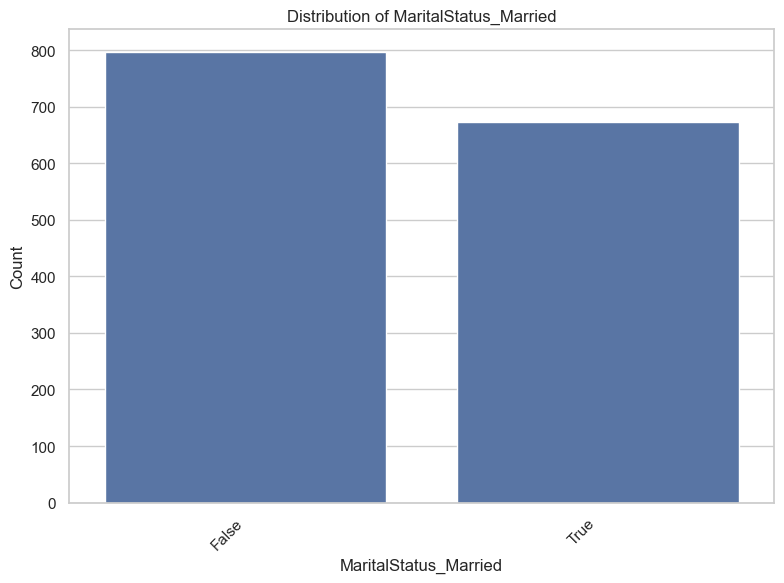

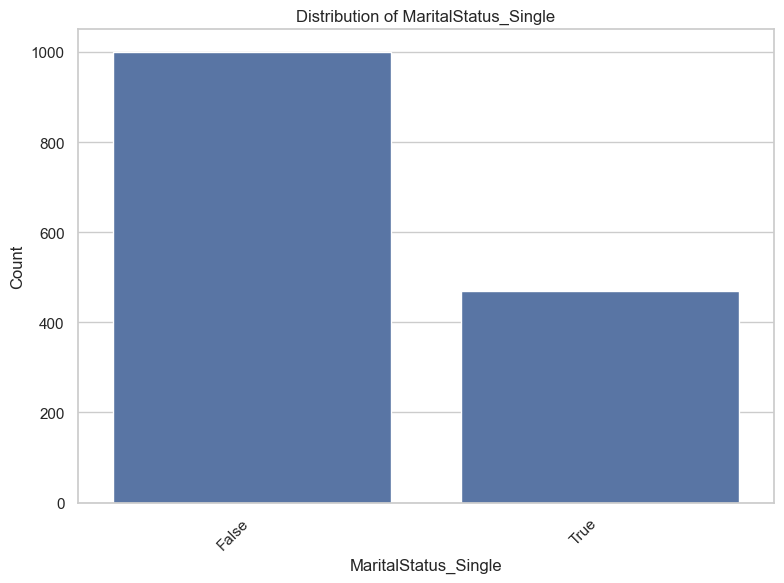

In [9]:
# ----------------------------------------
# Step 4.6.1: Univariate Analysis - Categorical Features (Encoded)
# ----------------------------------------

categorical_encoded_cols = [col for col in df.columns if col not in numerical_cols_eda + ['Attrition']]

for col in categorical_encoded_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

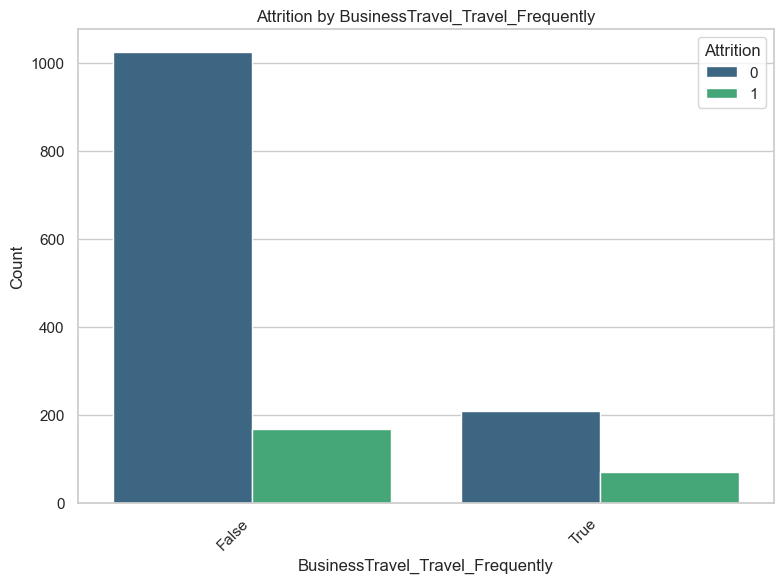

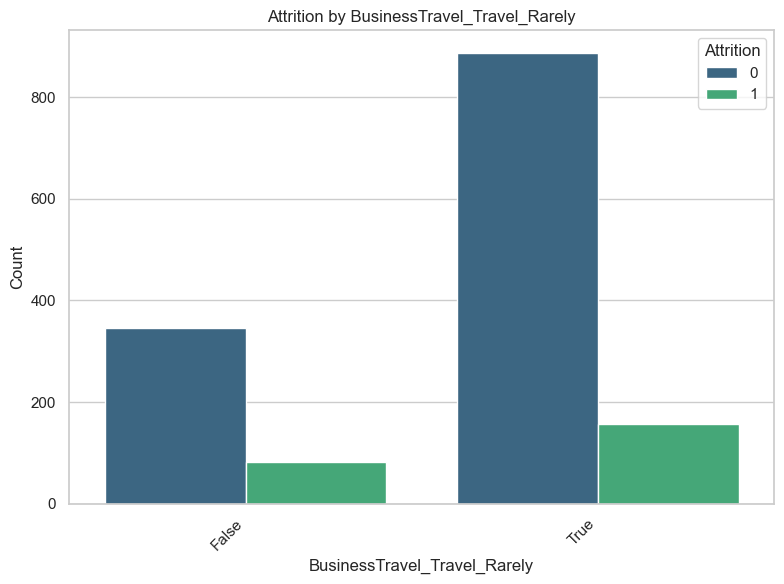

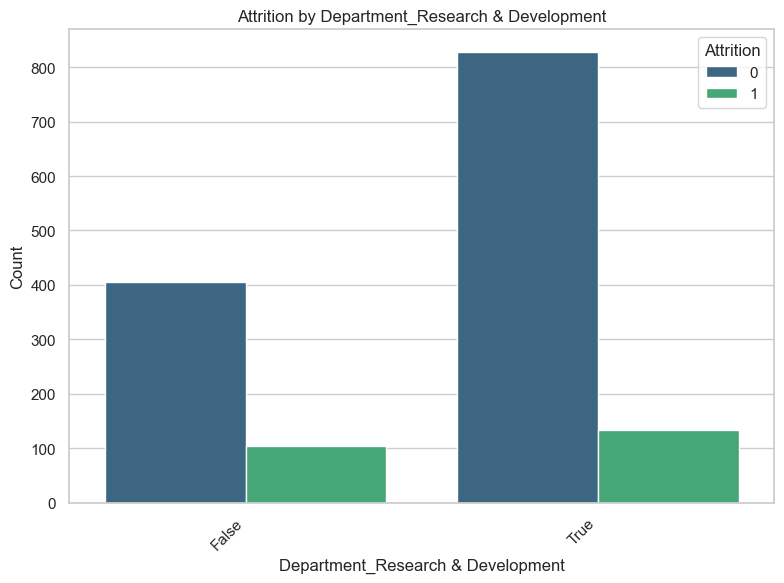

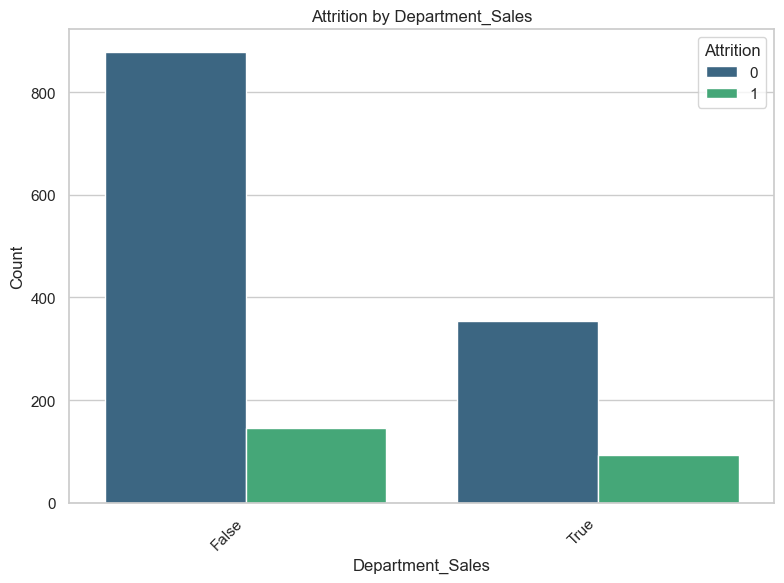

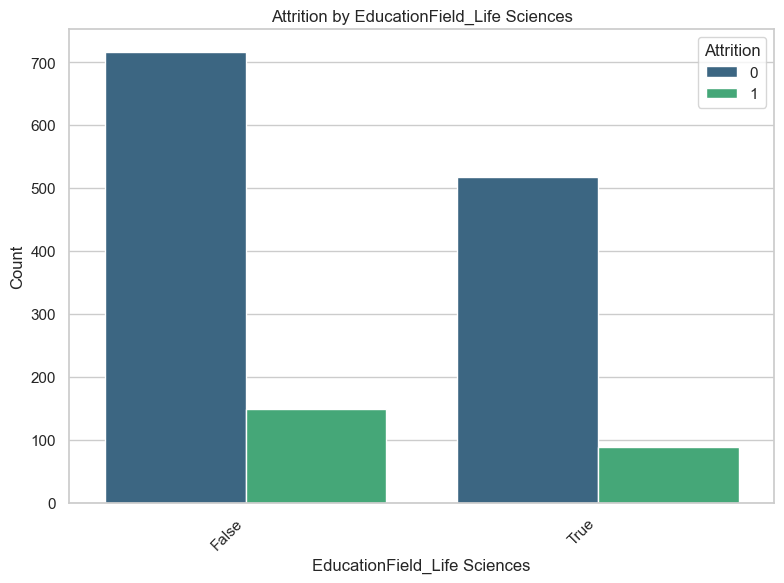

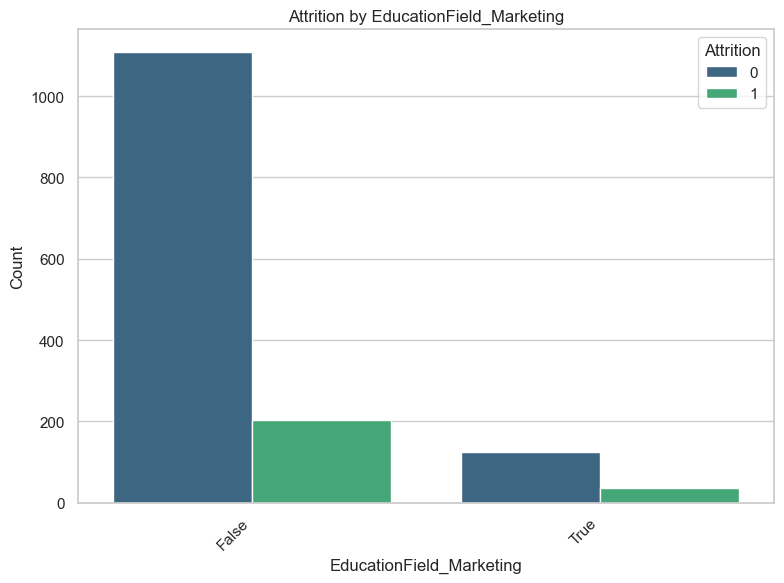

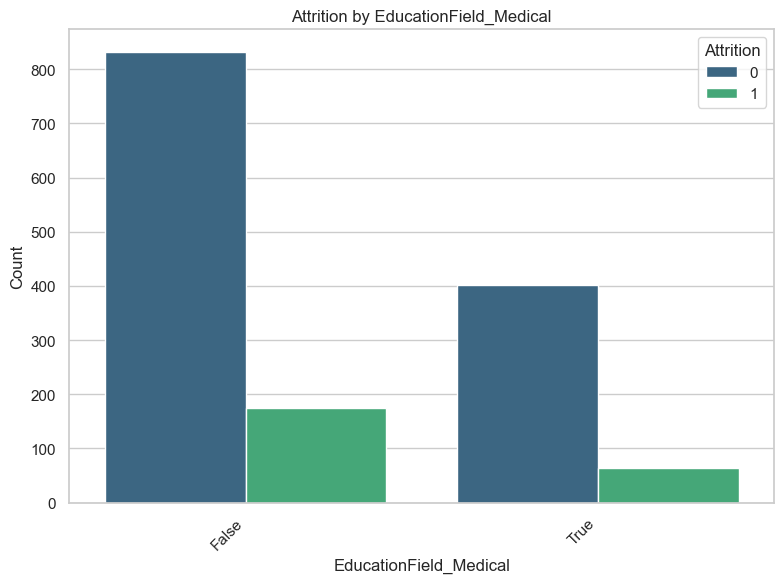

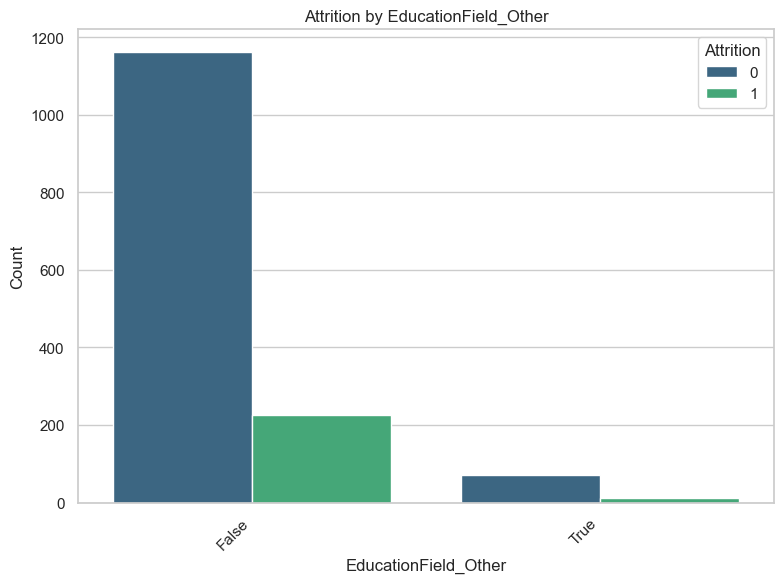

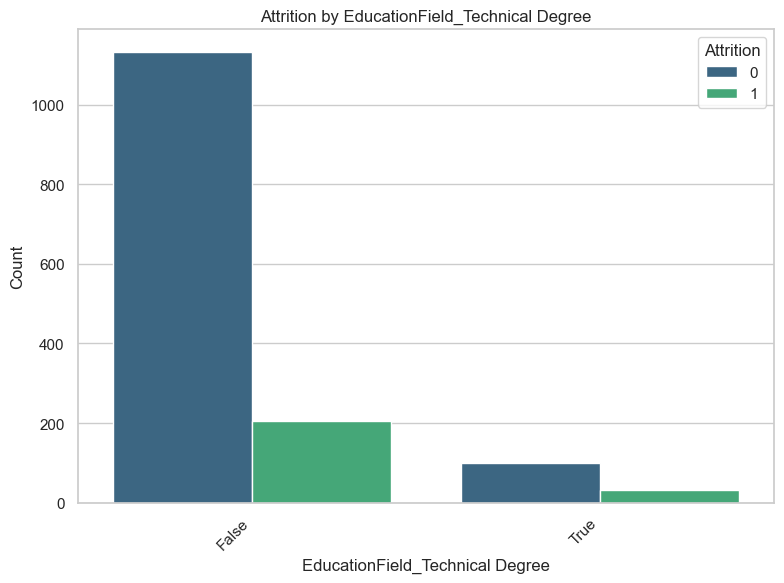

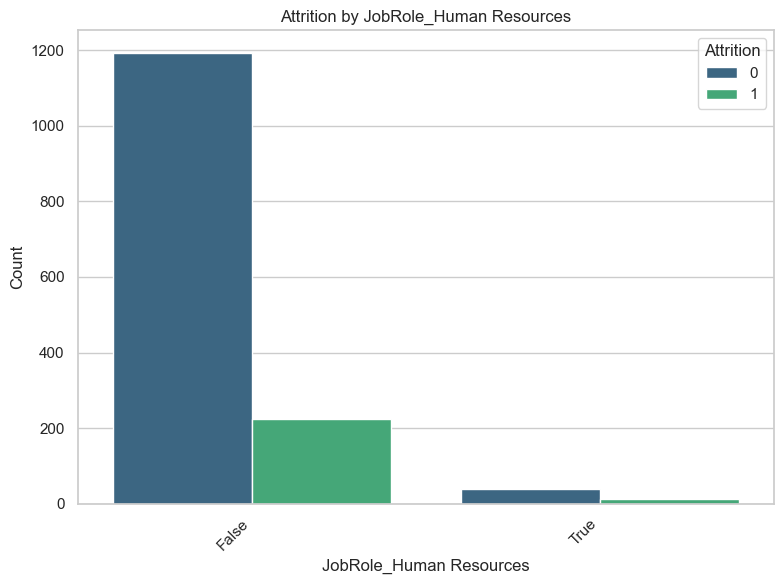

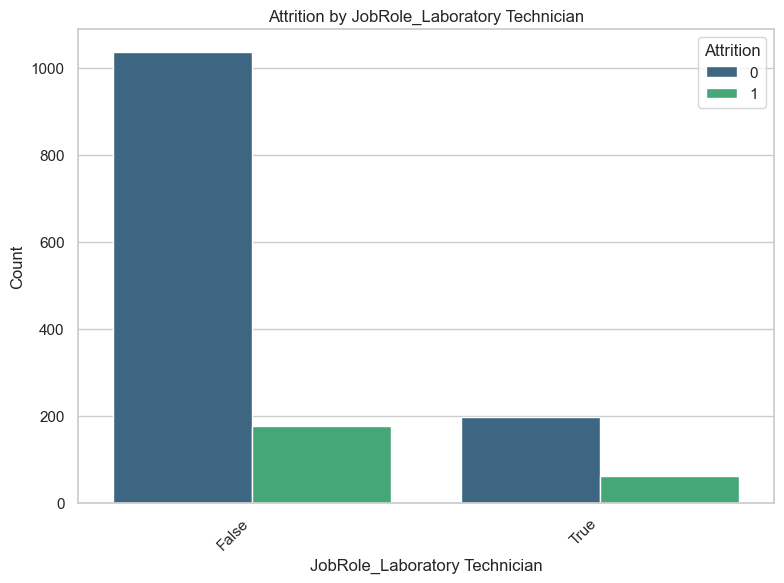

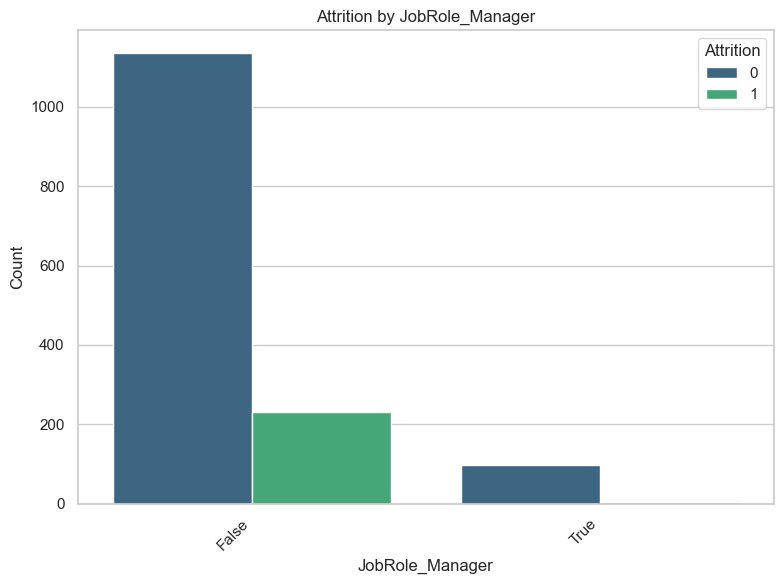

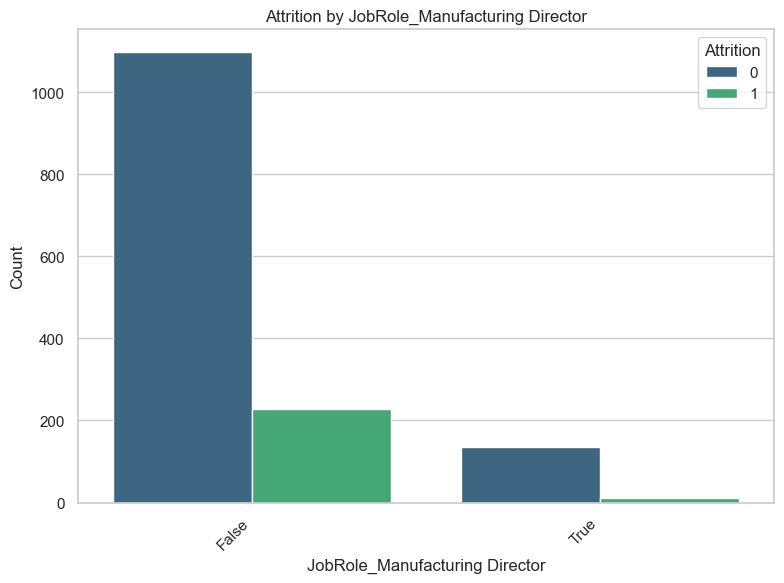

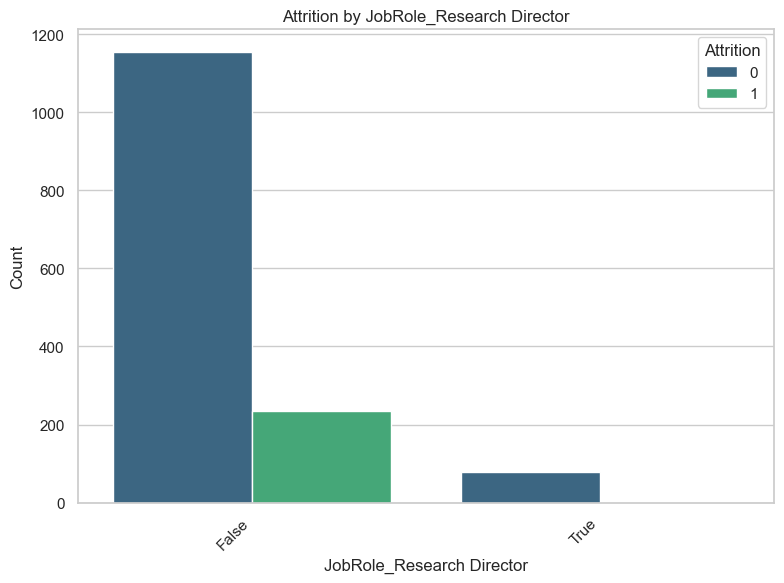

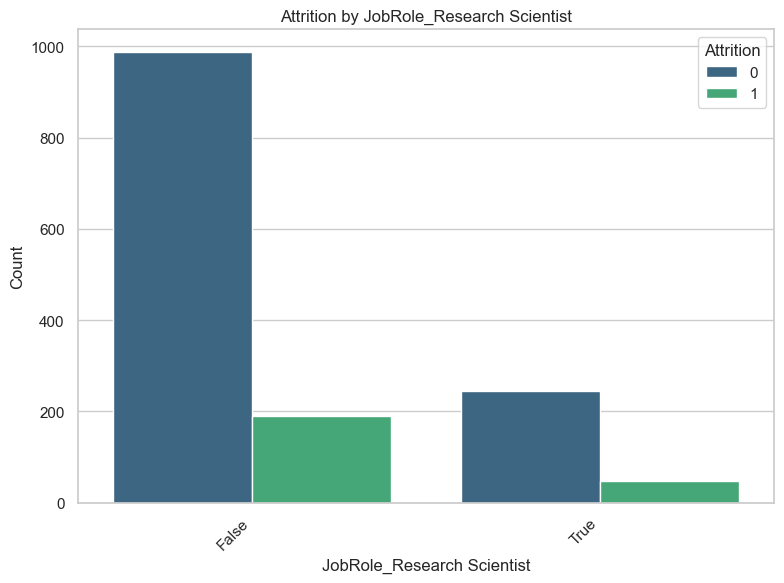

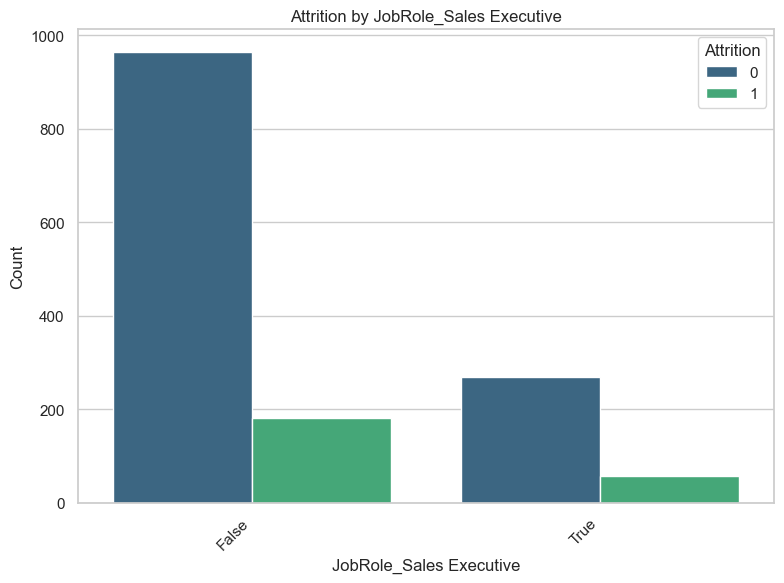

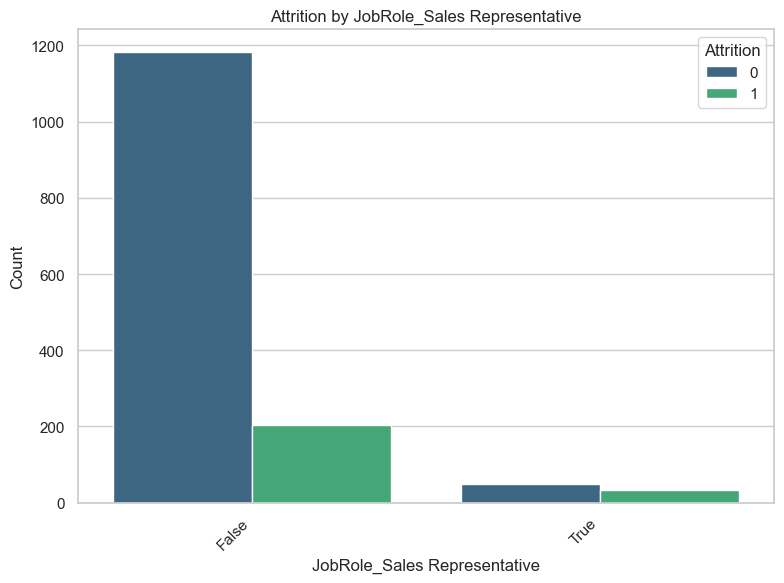

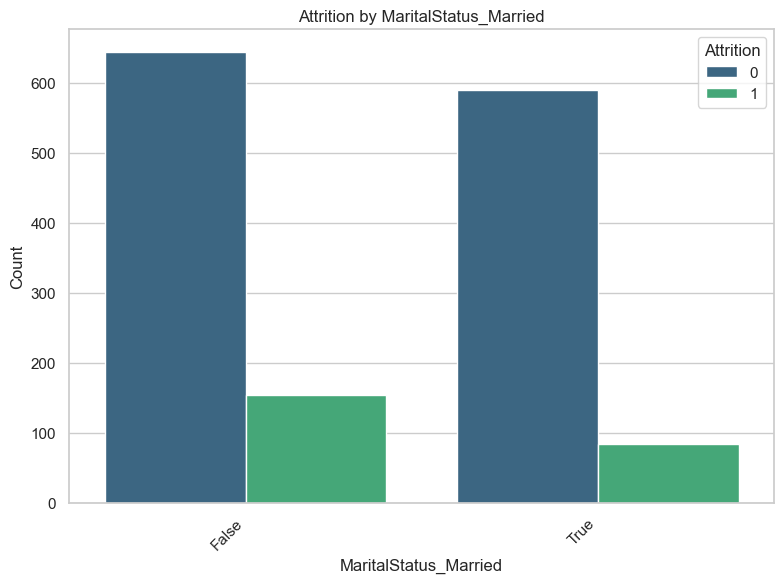

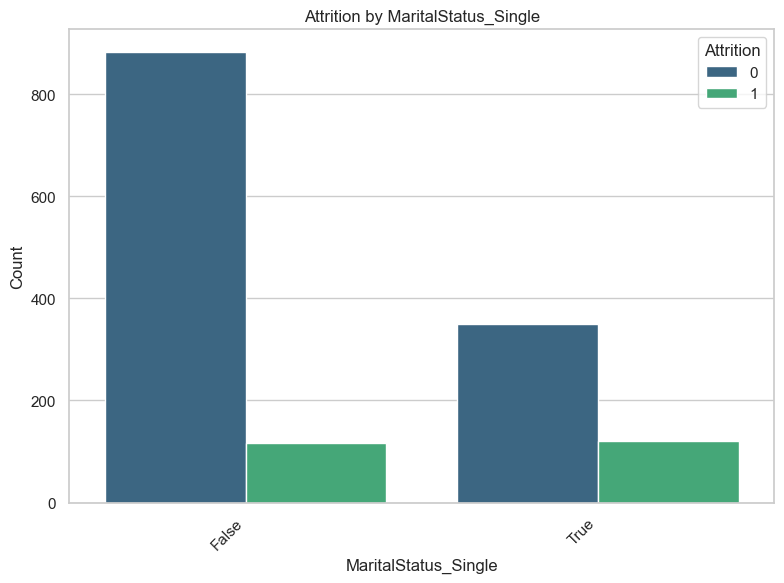

In [10]:
# ----------------------------------------
# Step 4.6.2: Bivariate Analysis - Categorical vs. Attrition
# ----------------------------------------

for col in categorical_encoded_cols:
    if df[col].nunique() < 10: # To avoid too many bars in the plot
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, hue='Attrition', data=df, palette='viridis')
        plt.title(f'Attrition by {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        # For high cardinality categorical features, let's look at proportions
        attrition_rate = df.groupby(col)['Attrition'].mean().sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        attrition_rate.plot(kind='bar', color='skyblue')
        plt.title(f'Attrition Rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Attrition Rate')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
        

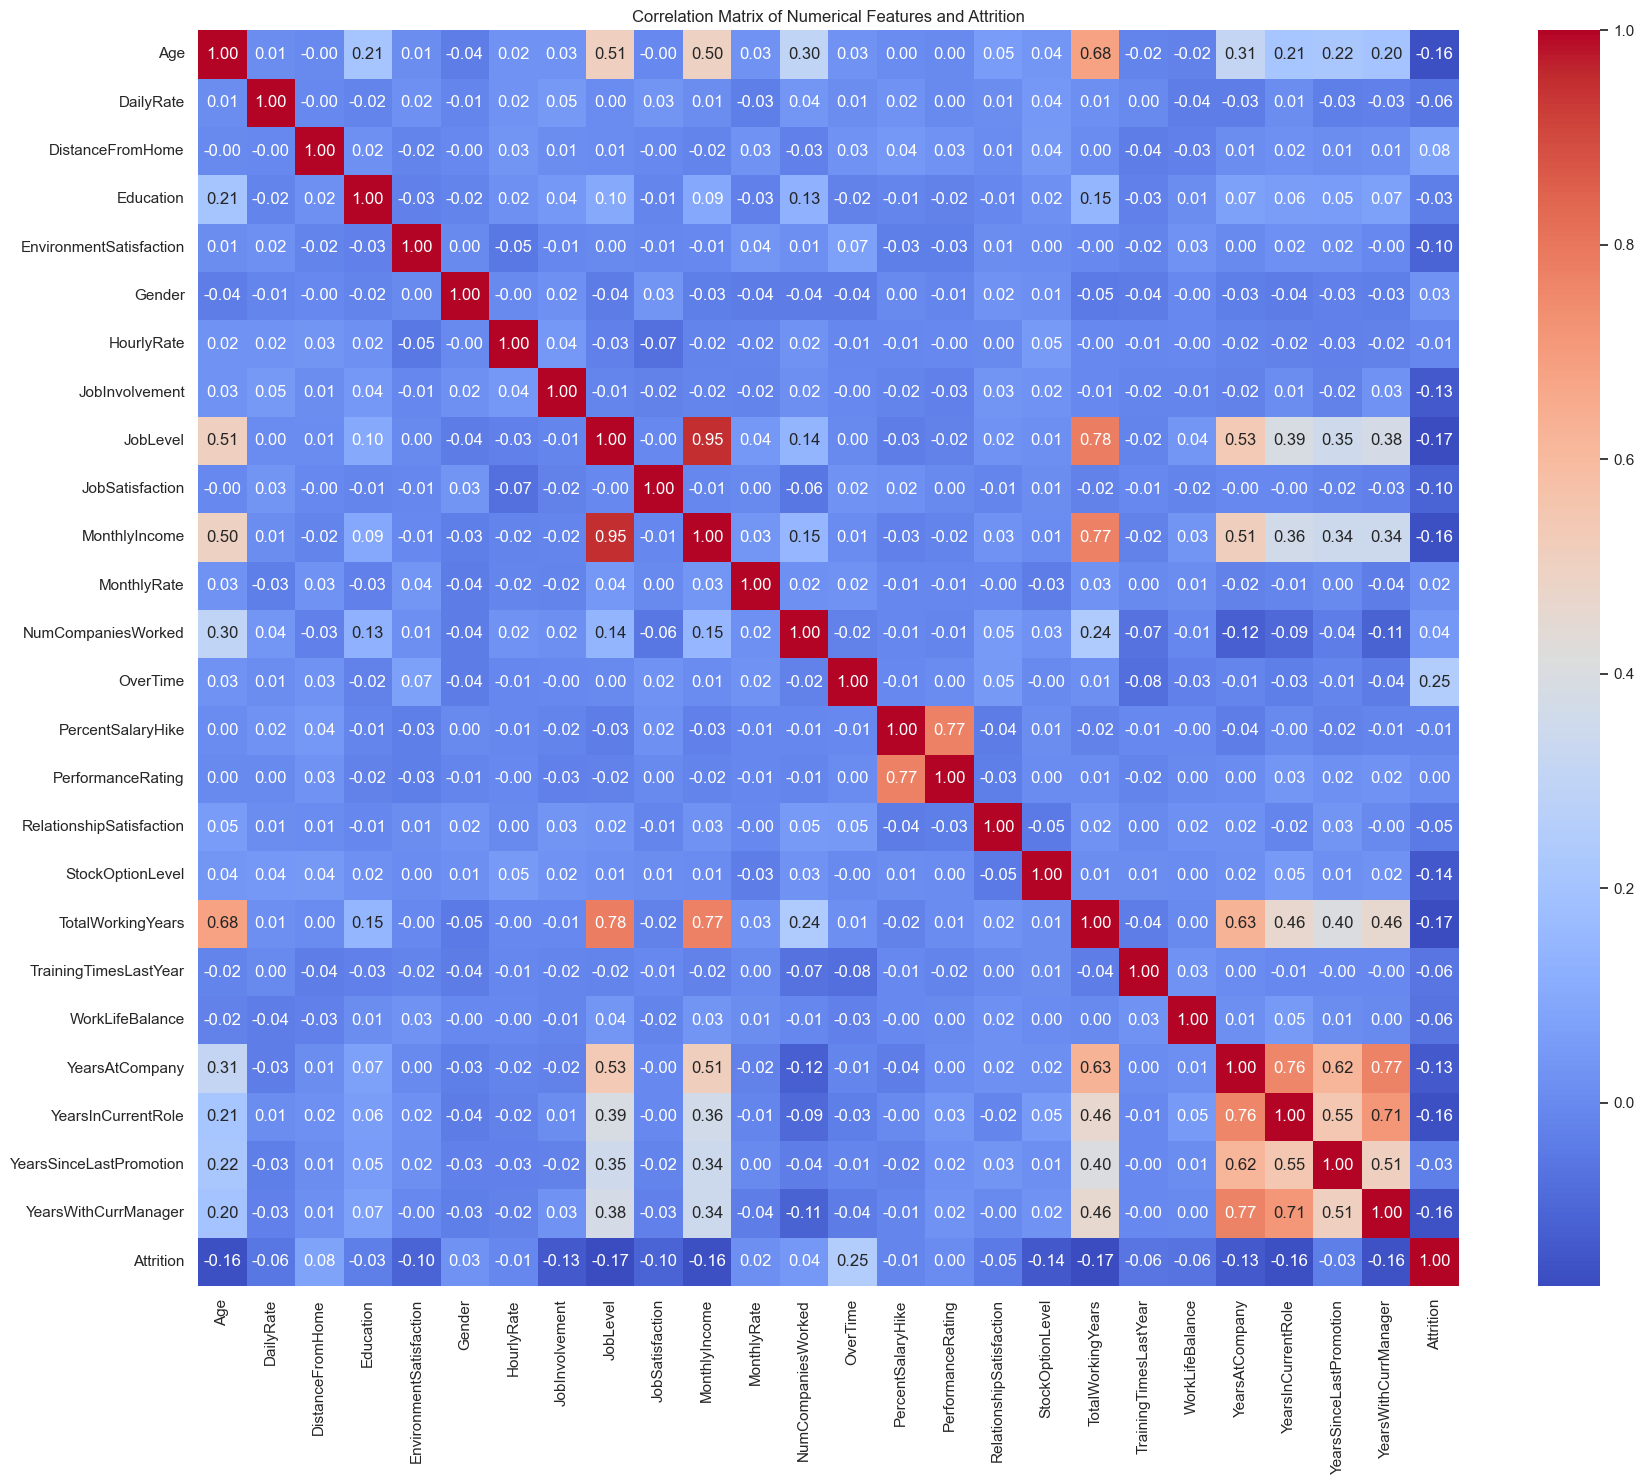

In [11]:
# ----------------------------------------
# Step 4.6.3: Multivariate Analysis - Correlation Matrix
# ----------------------------------------

correlation_matrix = df[numerical_cols_eda + ['Attrition']].corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Attrition')
plt.tight_layout()
plt.show()

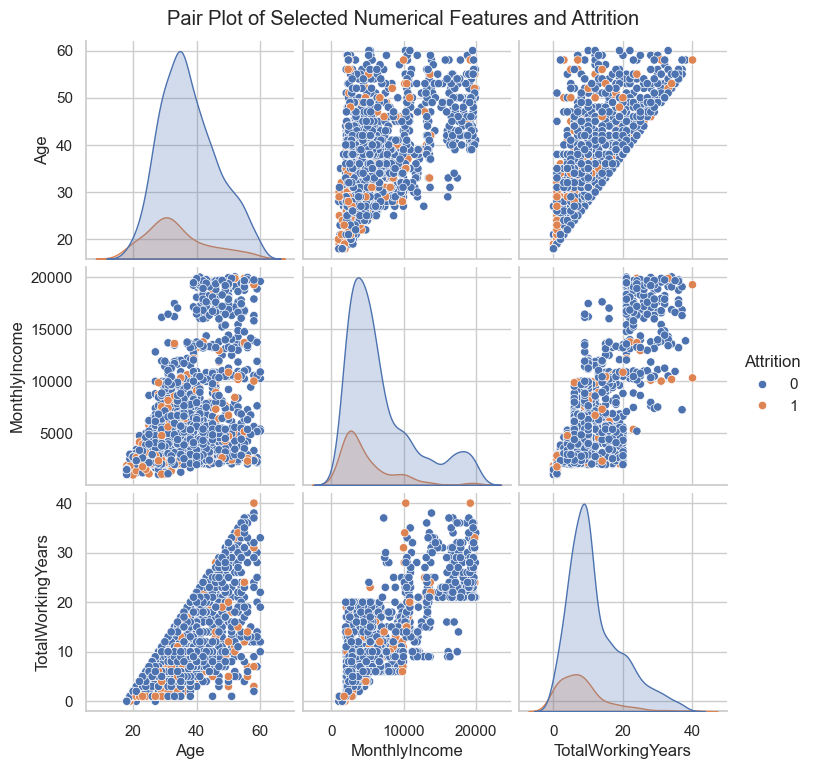

In [12]:
# ----------------------------------------
# Step 4.6.3: Multivariate Analysis - Pair Plots (Optional - uncomment to run)
# ----------------------------------------
sns.pairplot(df[['Age', 'MonthlyIncome', 'TotalWorkingYears', 'Attrition']], hue='Attrition')
plt.suptitle('Pair Plot of Selected Numerical Features and Attrition', y=1.02)
plt.show()

In [13]:
# ----------------------------------------
# Step 4.8: Descriptive Statistics
# ----------------------------------------

print("\n📌 Descriptive Statistics of Numerical Features:")
print(df[numerical_cols_eda].describe())


📌 Descriptive Statistics of Numerical Features:
               Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction       Gender   HourlyRate  JobInvolvement  \
count              1470.000000  1470.000000  1470.000000     1470.000000   
mean                  2.721769     0.600000    65.891156        2.729932   
std                   1.093082     0.490065    20.329428        0.711561   
min                   1.000000     0.000000    30.00

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# ✅ Step 1: Encode Features & Add Target Variable

# Assuming you have a DataFrame `df` with features and a column named 'Attrition' as target
features = df.drop('Attrition', axis=1)
target = df['Attrition']

# Encode features (e.g., one-hot or label encoding — assuming you’ve already done this)
features_encoded = pd.get_dummies(features, drop_first=True)

# Combine encoded features and map target to binary
df_encoded = features_encoded.copy()
df_encoded['Attrition_Yes'] = target.map({'Yes': 1, 'No': 0})

# 💡 Sanity checks
print("✅ 'Attrition_Yes' value counts:")
print(df_encoded['Attrition_Yes'].value_counts())
print(f"📐 Final dataset shape after encoding + target: {df_encoded.shape}")


✅ 'Attrition_Yes' value counts:
Series([], Name: count, dtype: int64)
📐 Final dataset shape after encoding + target: (1470, 45)


✅ Dropped unnecessary columns.
✅ One-Hot Encoding applied to: []
📐 Dataset shape after encoding: (1470, 45)
✅ Feature scaling applied to numerical columns.
New column names after encoding: Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationFiel

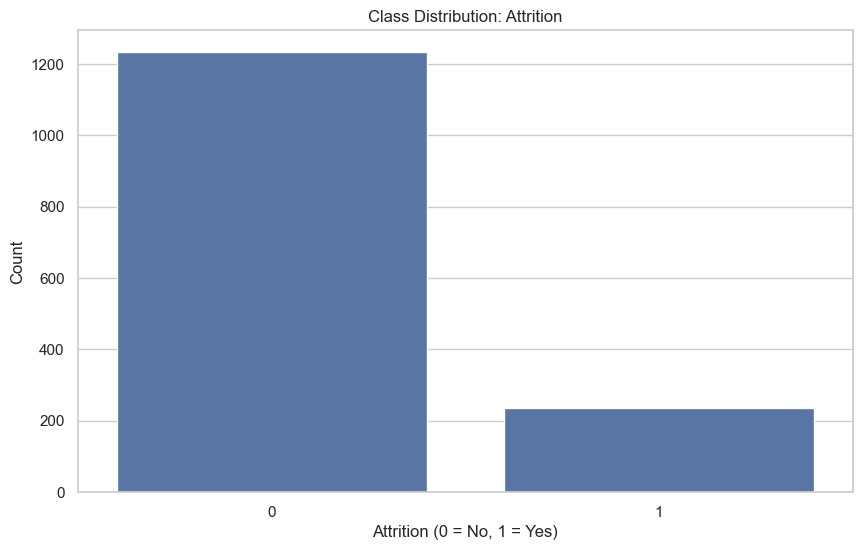

📊 Class Proportions (%):
Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# ----------------------------------------
# Step 5.1: Drop Redundant Features
# ----------------------------------------

columns_to_drop = ["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"]

try:
    df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')  # Added errors='ignore'
    print("✅ Dropped unnecessary columns.")
except KeyError as e:
    print(f"❌ KeyError: {e}. Please check if the columns exist in the DataFrame.")
    # Optionally, you can print the existing columns for debugging
    print("Existing columns:", df.columns)

# ----------------------------------------
# Step 5.2: Encode Remaining Categorical Variables
# ----------------------------------------
# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(f"✅ One-Hot Encoding applied to: {categorical_cols}")
print(f"📐 Dataset shape after encoding: {df_encoded.shape}")

# ----------------------------------------
# Step 5.3: Feature Scaling (For models like Logistic Regression, SVM, KNN)
# ----------------------------------------
# Identify numerical columns (excluding target)
num_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
if "Attrition_Yes" in df_encoded.columns and "Attrition" not in num_cols:
    pass
elif "Attrition" in num_cols:  # Check if 'Attrition' is in the list
    num_cols.remove("Attrition")  # Assuming "Attrition" is the target column
# Standard Scaling
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
print("✅ Feature scaling applied to numerical columns.")

# ----------------------------------------
# Step 5.4: Class Imbalance Check
# ----------------------------------------

# Check the new columns after encoding
print("New column names after encoding:", df_encoded.columns)

# Plot using the new 'Attrition' column
if 'Attrition_Yes' in df_encoded.columns:
    sns.countplot(x="Attrition_Yes", data=df_encoded)  # Use the encoded column name
else:
    sns.countplot(x="Attrition", data=df_encoded)  # Fallback to the original if not encoded

plt.title("Class Distribution: Attrition")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Calculate class proportions
attrition_counts = df_encoded["Attrition_Yes"].value_counts(normalize=True) * 100 if 'Attrition_Yes' in df_encoded.columns else df_encoded["Attrition"].value_counts(normalize=True) * 100
print("📊 Class Proportions (%):")
print(attrition_counts)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# ✅ Step 1: Prepare your DataFrame
# Assuming your DataFrame `df` is already loaded

# Check for missing values in the target variable (Attrition)
print("✅ Missing values in target variable before drop:")
target = df['Attrition']
print(target.isnull().sum())  # Check missing values in target

# If the target has missing values, we can fill them or drop them.
# For now, let's fill missing values with the most frequent value (you can adjust as needed)
if target.isnull().sum() > 0:
    most_frequent_target = target.mode()[0]
    target.fillna(most_frequent_target, inplace=True)

# Separate features and target
features = df.drop('Attrition', axis=1)
target_numerical = target.astype(int) # Ensure target is numerical (0 or 1)

# One-hot encode the features
features_encoded = pd.get_dummies(features, drop_first=True)

# ✅ Step 2: Scaling (Apply only to features)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(features_encoded), columns=features_encoded.columns)

# ✅ Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, target_numerical, test_size=0.2, random_state=42, stratify=target_numerical
)

print("✅ Train-test split completed.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# ✅ Step 4: Model evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return {
        'Model': model.__class__.__name__,
        'Train Precision': precision_score(y_train, y_train_pred),
        'Train Recall': recall_score(y_train, y_train_pred),
        'Train F1': f1_score(y_train, y_train_pred),
        'Train ROC AUC': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
        'Test Precision': precision_score(y_test, y_test_pred),
        'Test Recall': recall_score(y_test, y_test_pred),
        'Test F1': f1_score(y_test, y_test_pred),
        'Test ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

# ✅ Step 5: Define models
models = [
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
]

# ✅ Step 6: Evaluate on original data
results = [evaluate_model(model, X_train, X_test, y_train, y_test) for model in models]
results_df = pd.DataFrame(results)

# ✅ Step 7: Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("✅ SMOTE applied. Balanced class distribution:")
print(y_train_balanced.value_counts())

# ✅ Step 8: Evaluate on SMOTE balanced data
balanced_results = [evaluate_model(model, X_train_balanced, X_test, y_train_balanced, y_test) for model in models]
balanced_results_df = pd.DataFrame(balanced_results)

# ✅ Step 9: Combine results
combined_results_df = pd.concat(
    [results_df.set_index('Model'), balanced_results_df.set_index('Model')],
    axis=1,
    keys=['Original', 'SMOTE Balanced']
)

# ✅ Step 10: Display and interpret results
print("\n📊 Model Performance Comparison (Original vs SMOTE Balanced):\n")
print(combined_results_df)

best_model_original = combined_results_df[('Original', 'Test F1')].idxmax()
best_model_balanced = combined_results_df[('SMOTE Balanced', 'Test F1')].idxmax()

print(f"\n🏆 Best model on Original data (based on Test F1): {best_model_original}")
print(f"🏆 Best model on SMOTE Balanced data (based on Test F1): {best_model_balanced}")

✅ Missing values in target variable before drop:
0
✅ Train-test split completed.
X_train shape: (1176, 44)
X_test shape: (294, 44)
y_train shape: (1176,)
y_test shape: (294,)


  File "C:\Users\arpit\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\Python310\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


✅ SMOTE applied. Balanced class distribution:
Attrition
0    986
1    986
Name: count, dtype: int64

📊 Model Performance Comparison (Original vs SMOTE Balanced):

                              Original                                       \
                       Train Precision Train Recall  Train F1 Train ROC AUC   
Model                                                                         
DecisionTreeClassifier        1.000000     1.000000  1.000000      1.000000   
GaussianNB                    0.281609     0.773684  0.412921      0.771373   
RandomForestClassifier        1.000000     1.000000  1.000000      1.000000   
AdaBoostClassifier            0.857143     0.442105  0.583333      0.897342   
XGBClassifier                 1.000000     1.000000  1.000000      1.000000   

                                                                          \
                       Test Precision Test Recall   Test F1 Test ROC AUC   
Model                                               

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, precision_score, recall_score

# Define the parameter grid for GaussianNB
param_grid_gnb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Create a GridSearchCV object
grid_search_gnb = GridSearchCV(
    GaussianNB(),
    param_grid_gnb,
    scoring={
        'f1': make_scorer(f1_score),
        'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score)
    },
    refit='f1',  # Refit the model with the best F1 score
    cv=5,       # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Perform the grid search on the original training data
grid_search_gnb.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_gnb = grid_search_gnb.best_params_
best_score_gnb = grid_search_gnb.best_score_

print("\n📊 GaussianNB Tuning Results (Original Data):")
print(f"Best Parameters: {best_params_gnb}")
print(f"Best Cross-Validation F1 Score: {best_score_gnb:.4f}")

# Evaluate the best model on the test set
best_model_gnb = grid_search_gnb.best_estimator_
y_pred_gnb_tuned = best_model_gnb.predict(X_test)
y_proba_gnb_tuned = best_model_gnb.predict_proba(X_test)[:, 1]

print("\n📈 GaussianNB Performance on Test Set (Tuned - Original Data):")
print(f"Test Precision: {precision_score(y_test, y_pred_gnb_tuned):.4f}")
print(f"Test Recall: {recall_score(y_test, y_pred_gnb_tuned):.4f}")
print(f"Test F1 Score: {f1_score(y_test, y_pred_gnb_tuned):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_proba_gnb_tuned):.4f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits

📊 GaussianNB Tuning Results (Original Data):
Best Parameters: {'var_smoothing': 1e-07}
Best Cross-Validation F1 Score: 0.3906

📈 GaussianNB Performance on Test Set (Tuned - Original Data):
Test Precision: 0.2500
Test Recall: 0.7021
Test F1 Score: 0.3687
Test ROC AUC: 0.6956


In [18]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, roc_auc_score, classification_report

# 1. Define the Parameter Grid

# AdaBoost has some key hyperparameters to tune:
# - n_estimators: The number of boosting stages (number of weak learners).
# - learning_rate: How much each boosting stage contributes to the final prediction.

param_grid_adaboost = {
    'n_estimators': [50, 100, 200, 300, 400], # Increased range
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4], # Increased range
    'algorithm': ['SAMME', 'SAMME.R']  # Algorithm to use for boosting
}

# 2. Initialize AdaBoost Classifier

adaboost_clf = AdaBoostClassifier(random_state=42)

# 3. Set up Cross-Validation

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Define Scoring Metrics

scoring = {
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# 5. Perform GridSearchCV or RandomizedSearchCV

# GridSearchCV (Exhaustive search - can be slower)
grid_search_adaboost = GridSearchCV(
    estimator=adaboost_clf,
    param_grid=param_grid_adaboost,
    cv=cv,
    scoring=scoring,
    refit='f1',  # Refit with the best F1 score
    n_jobs=-1,
    verbose=1
)

# RandomizedSearchCV (Random search - often faster)
random_search_adaboost = RandomizedSearchCV(
    estimator=adaboost_clf,
    param_distributions=param_grid_adaboost,
    n_iter=10,  # Number of parameter settings sampled
    cv=cv,
    scoring=scoring,
    refit='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Choose one of the searches below:
# Fit the GridSearchCV (Uncomment to run)
# grid_search_adaboost.fit(X_train_balanced, y_train_balanced)

# Fit the RandomizedSearchCV (Uncomment to run)
random_search_adaboost.fit(X_train_balanced, y_train_balanced)

# 6. Get Best Parameters and Results

# For GridSearchCV:
# best_params_adaboost = grid_search_adaboost.best_params_
# best_score_adaboost = grid_search_adaboost.best_score_
# results_adaboost = grid_search_adaboost.cv_results_

# For RandomizedSearchCV:
best_params_adaboost = random_search_adaboost.best_params_
best_score_adaboost = random_search_adaboost.best_score_
results_adaboost = random_search_adaboost.cv_results_

print("\n📊 AdaBoost Tuning Results (Balanced Data):")
print("Best Parameters:", best_params_adaboost)
print("Best Cross-Validation F1 Score:", best_score_adaboost)

# 7. Evaluate on Test Set

# Get the best model
# best_adaboost_model = grid_search_adaboost.best_estimator_  # For GridSearchCV
best_adaboost_model = random_search_adaboost.best_estimator_ # For RandomizedSearchCV

# Make predictions on the test set
y_pred_adaboost_test = best_adaboost_model.predict(X_test)

# Evaluate the best model
print("\n📈 AdaBoost Performance on Test Set (Tuned - Balanced Data):")
print(classification_report(y_test, y_pred_adaboost_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits

📊 AdaBoost Tuning Results (Balanced Data):
Best Parameters: {'n_estimators': 300, 'learning_rate': 0.1, 'algorithm': 'SAMME'}
Best Cross-Validation F1 Score: 0.8708814327711542

📈 AdaBoost Performance on Test Set (Tuned - Balanced Data):
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       247
           1       0.36      0.62      0.46        47

    accuracy                           0.77       294
   macro avg       0.64      0.71      0.65       294
weighted avg       0.83      0.77      0.79       294



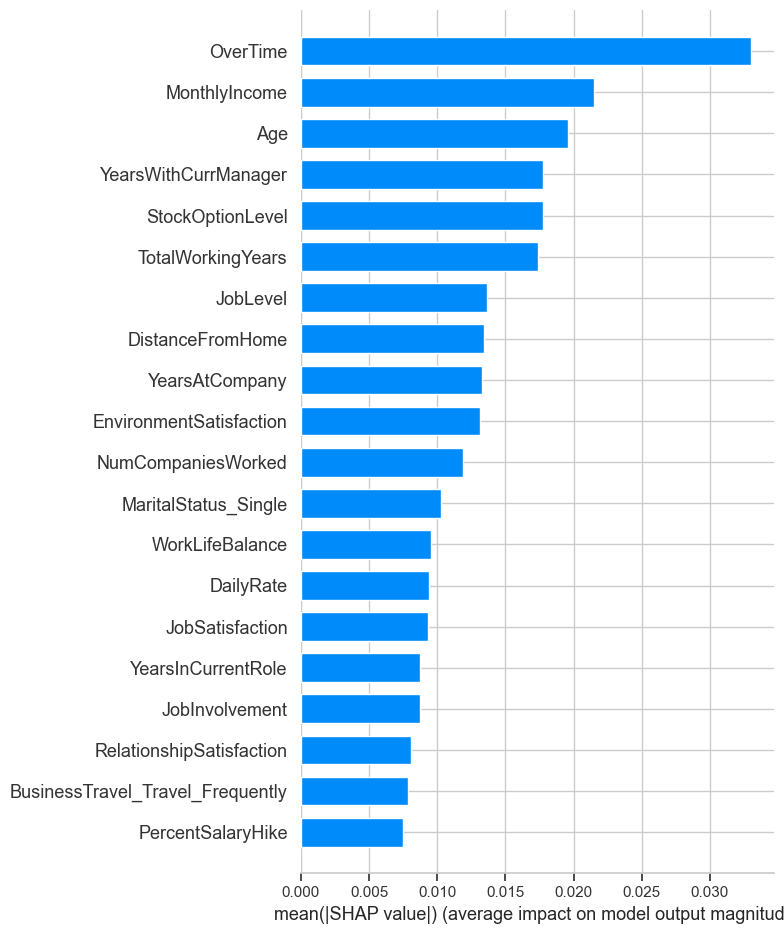

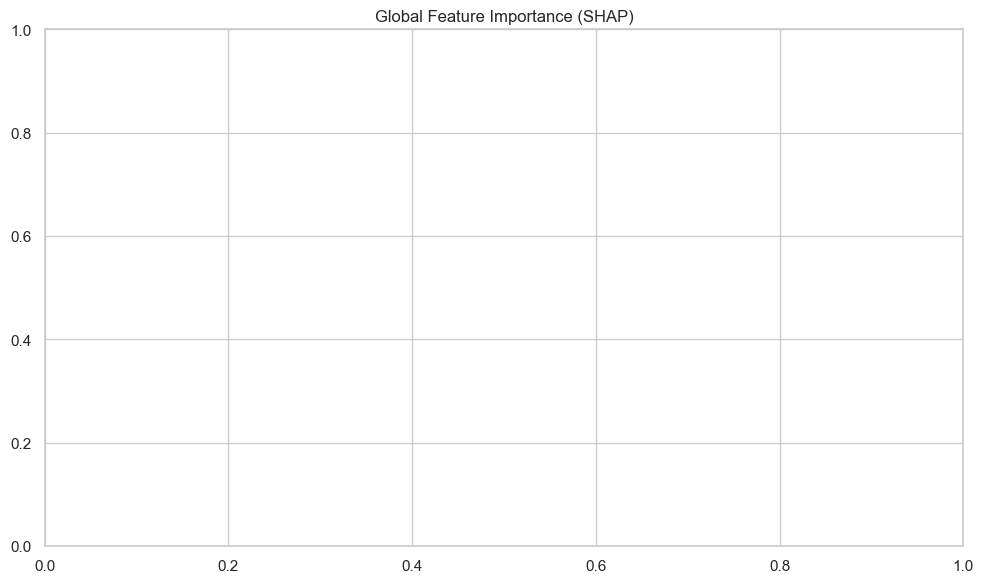


--- Business Explanation of Global Feature Importance ---
The SHAP summary plot above shows the global importance of each feature in predicting employee attrition.
Features with longer bars have a greater impact on the model's output.
The color of the bar indicates the direction of the effect:
- Red: Higher values of the feature tend to increase the likelihood of attrition.
- Blue: Lower values of the feature tend to increase the likelihood of attrition (or decrease the likelihood of staying).

Based on this plot, we can identify the most influential factors driving employee turnover. For example, if 'OverTime_Yes' has a long red bar, it suggests that employees working overtime are significantly more likely to leave. Conversely, if 'JobSatisfaction' has a long blue bar, lower job satisfaction strongly correlates with higher attrition.

Understanding these global drivers allows the company to focus on systemic issues that affect a large number of employees.

--- SHAP Waterfall Plots fo

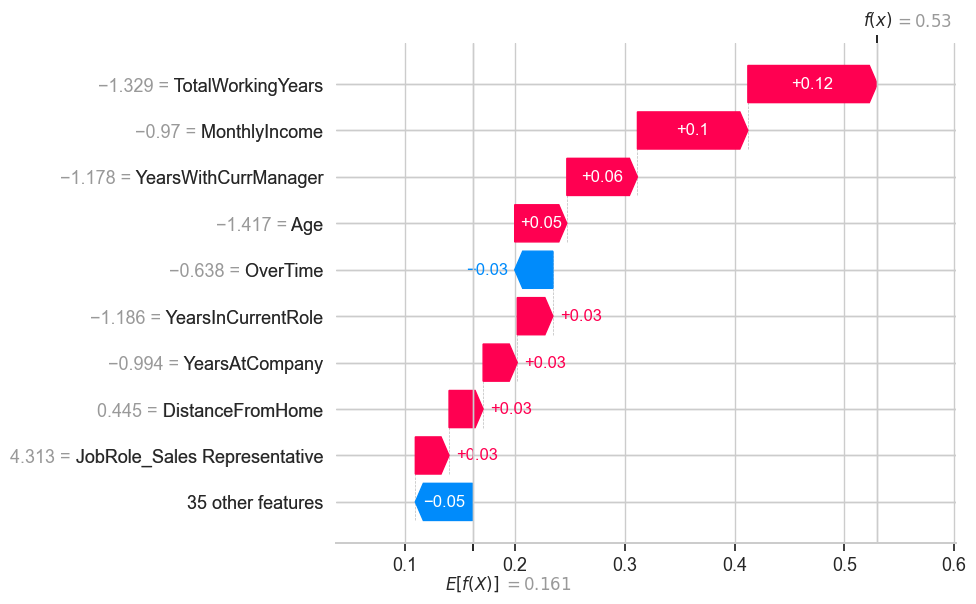

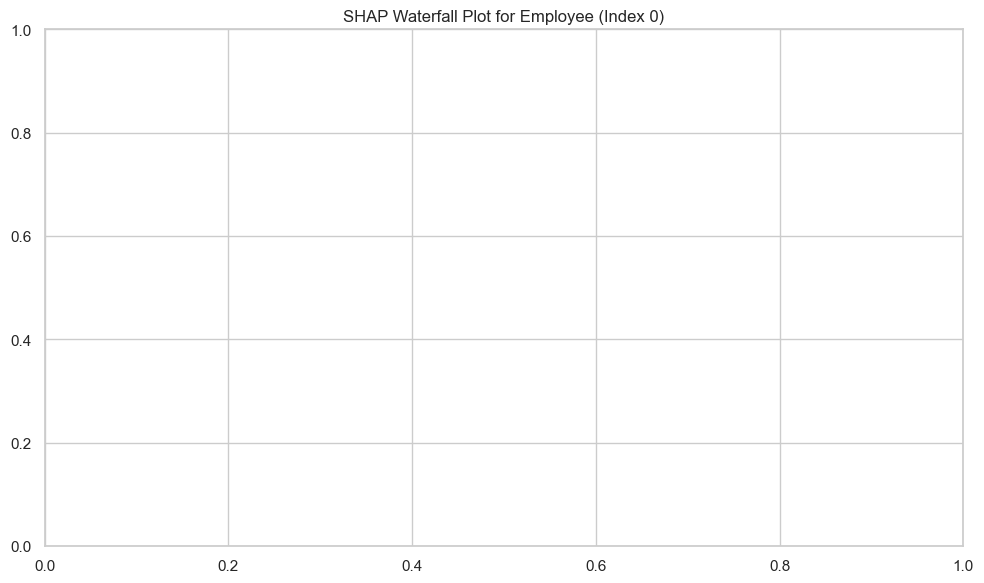


Business Explanation for Employee (Index 0):
The waterfall plot above explains the prediction of attrition for a specific employee.
The base value represents the average prediction of the model (the likelihood of attrition if all features were at their mean).
Each feature contributes positively (red) or negatively (blue) to the final prediction for this employee.
The final value is the model's predicted probability of attrition for this employee.

For this employee, we can see which specific factors are pushing their predicted likelihood of leaving up or down. For example:
- Higher 'MonthlyIncome' is increasing their likelihood of leaving.
- Higher 'TotalWorkingYears' is increasing their likelihood of leaving.

This level of individual explanation can be valuable for understanding specific cases and potentially intervening proactively if the predicted risk of attrition is high.


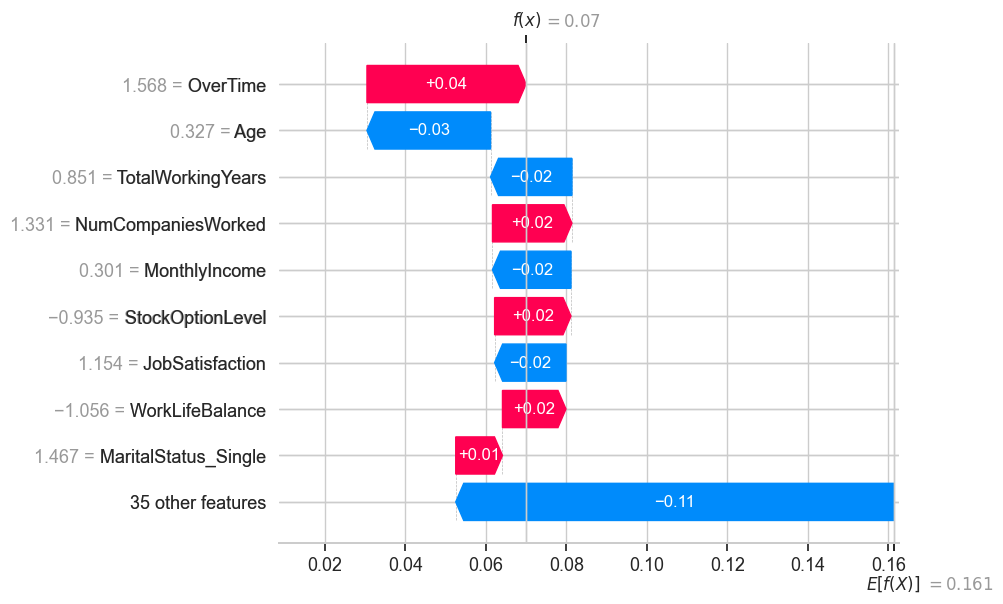

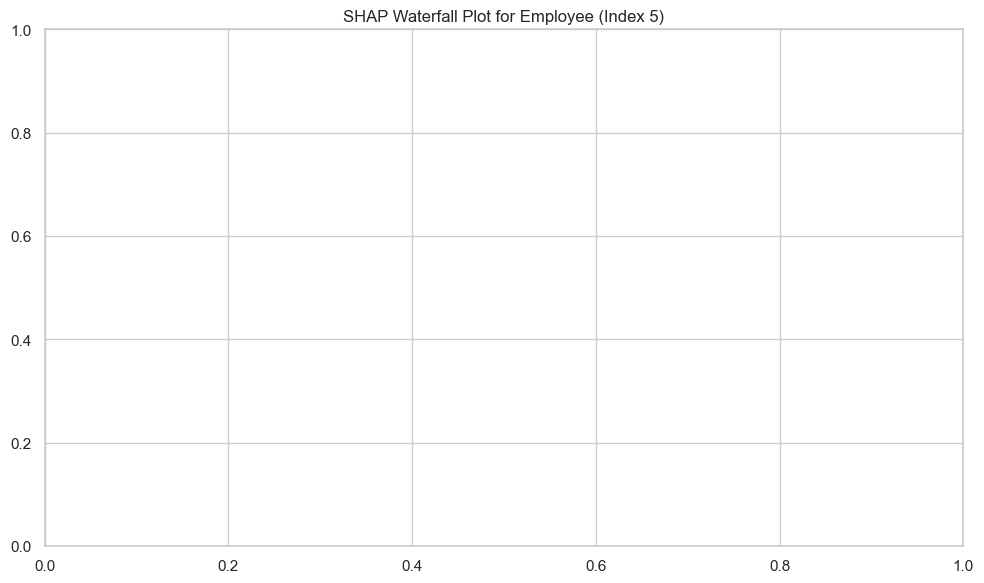


Business Explanation for Employee (Index 5):
The waterfall plot above explains the prediction of attrition for a specific employee.
The base value represents the average prediction of the model (the likelihood of attrition if all features were at their mean).
Each feature contributes positively (red) or negatively (blue) to the final prediction for this employee.
The final value is the model's predicted probability of attrition for this employee.

For this employee, we can see which specific factors are pushing their predicted likelihood of leaving up or down. For example:

This level of individual explanation can be valuable for understanding specific cases and potentially intervening proactively if the predicted risk of attrition is high.


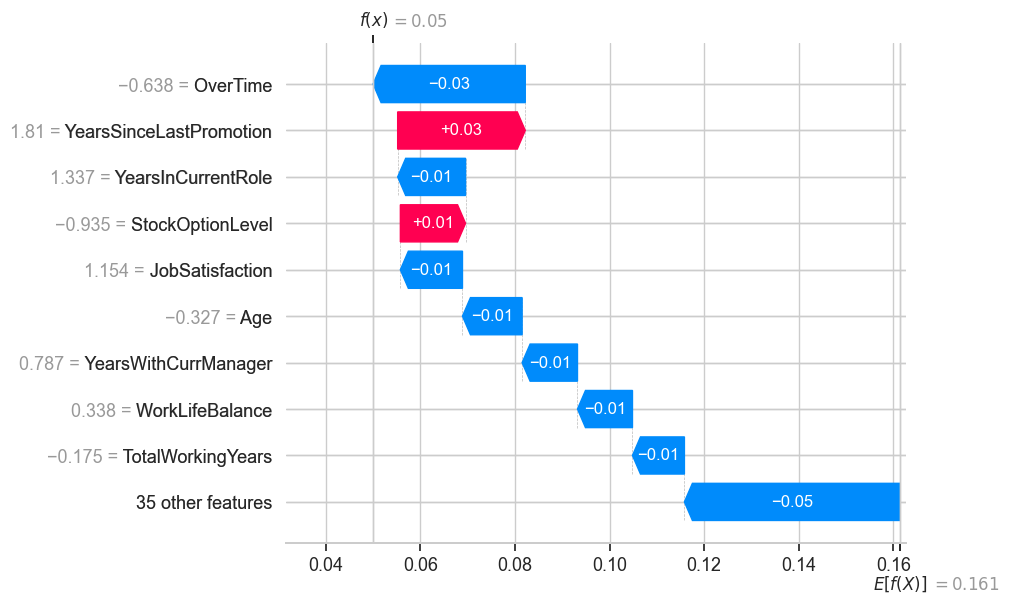

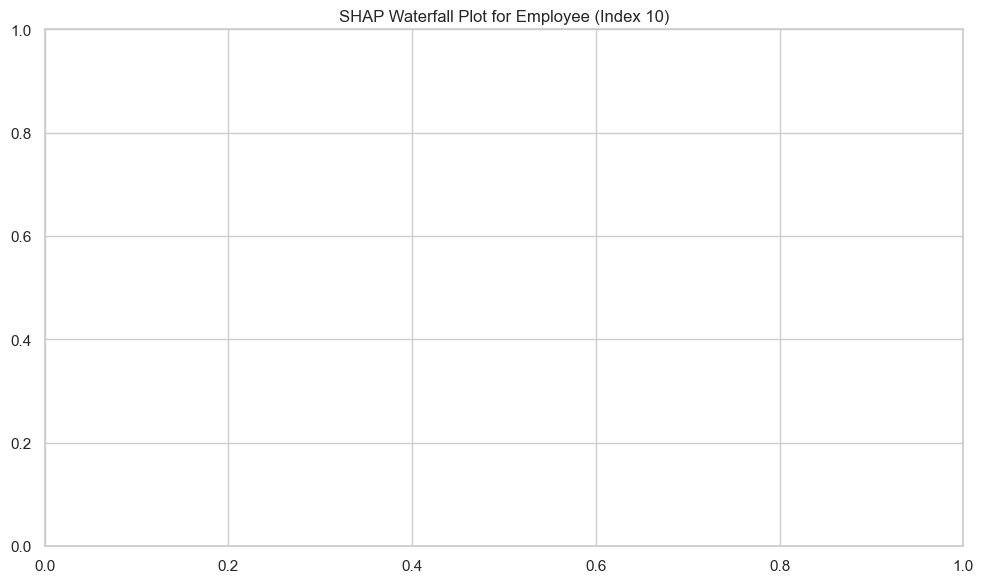


Business Explanation for Employee (Index 10):
The waterfall plot above explains the prediction of attrition for a specific employee.
The base value represents the average prediction of the model (the likelihood of attrition if all features were at their mean).
Each feature contributes positively (red) or negatively (blue) to the final prediction for this employee.
The final value is the model's predicted probability of attrition for this employee.

For this employee, we can see which specific factors are pushing their predicted likelihood of leaving up or down. For example:

This level of individual explanation can be valuable for understanding specific cases and potentially intervening proactively if the predicted risk of attrition is high.

--- Business Explanation of Why People Leave (Synthesized Insights) ---
Combining the global feature importance and the individual waterfall plots, we can derive key business insights into why people leave the company:

**Key Drivers of Attrition

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

# SHAP library
import shap
import matplotlib.pyplot as plt

# --- Data Preprocessing (as done before) ---
# Handle missing values in target (if any)
df['Attrition'].fillna('No', inplace=True)

# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Yes=1, No=0

# Identify categorical and numerical features
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=np.number).columns

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames (for SHAP)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# --- Model Training (using a well-performing model - e.g., RandomForest) ---
model = RandomForestClassifier(random_state=42, n_estimators=100) # You can use your best performing model here
model.fit(X_train_scaled, y_train)

# --- SHAP Analysis ---

# Initialize JavaScript visualization for SHAP (only needed in Jupyter notebooks)
# shap.initjs()

# Create a SHAP explainer
explainer = shap.TreeExplainer(model, feature_names=X_train.columns) # Explicitly pass feature names

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled_df)
shap_values_positive = np.array(shap_values)[:, :, 1]

# Create SHAP Explanation object
shap_explanation = shap.Explanation(
    values=shap_values_positive,
    base_values=explainer.expected_value[1],
    data=X_test_scaled_df,
    feature_names=X_test_scaled_df.columns
)

# --- 1. Global SHAP Summary (Feature Importance) ---
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_explanation, plot_type="bar") # Use the Explanation object
plt.title("Global Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

# Business Explanation of Global Feature Importance:
print("\n--- Business Explanation of Global Feature Importance ---")
print("The SHAP summary plot above shows the global importance of each feature in predicting employee attrition.")
print("Features with longer bars have a greater impact on the model's output.")
print("The color of the bar indicates the direction of the effect:")
print("- Red: Higher values of the feature tend to increase the likelihood of attrition.")
print("- Blue: Lower values of the feature tend to increase the likelihood of attrition (or decrease the likelihood of staying).")
print("\nBased on this plot, we can identify the most influential factors driving employee turnover. For example, if 'OverTime_Yes' has a long red bar, it suggests that employees working overtime are significantly more likely to leave. Conversely, if 'JobSatisfaction' has a long blue bar, lower job satisfaction strongly correlates with higher attrition.")
print("\nUnderstanding these global drivers allows the company to focus on systemic issues that affect a large number of employees.")

# --- 2. SHAP Waterfall Plot for Individual Employees ---

# Select a few individual employees (you can choose specific indices)
employee_indices = [0, 5, 10] # Example indices

print("\n--- SHAP Waterfall Plots for Individual Employees ---")
for i in employee_indices:
    plt.figure(figsize=(12, 6))
    shap.waterfall_plot(shap_explanation[i]) # Pass the Explanation object for the individual instance
    plt.title(f"SHAP Waterfall Plot for Employee (Index {i})")
    plt.tight_layout()
    plt.show()

    # Business Explanation for Individual Employee:
    print(f"\nBusiness Explanation for Employee (Index {i}):")
    print("The waterfall plot above explains the prediction of attrition for a specific employee.")
    print("The base value represents the average prediction of the model (the likelihood of attrition if all features were at their mean).")
    print("Each feature contributes positively (red) or negatively (blue) to the final prediction for this employee.")
    print("The final value is the model's predicted probability of attrition for this employee.")
    print("\nFor this employee, we can see which specific factors are pushing their predicted likelihood of leaving up or down. For example:")
    for feature in X_test_scaled_df.columns:
        shap_val = shap_explanation.values[i][X_test_scaled_df.columns.get_loc(feature)]
        if shap_val > 0.1: # Example threshold for significant positive contribution
            print(f"- Higher '{feature}' is increasing their likelihood of leaving.")
        elif shap_val < -0.1: # Example threshold for significant negative contribution
            print(f"- Lower '{feature}' is decreasing their likelihood of leaving.")
    print("\nThis level of individual explanation can be valuable for understanding specific cases and potentially intervening proactively if the predicted risk of attrition is high.")

# --- 3. Business Explanation of Why People Leave (Synthesized Insights) ---

print("\n--- Business Explanation of Why People Leave (Synthesized Insights) ---")
print("Combining the global feature importance and the individual waterfall plots, we can derive key business insights into why people leave the company:")
print("\n**Key Drivers of Attrition (Based on SHAP Analysis):**")

# Analyze the top positive and negative contributing features from the global summary plot
feature_importance = pd.Series(np.abs(shap_explanation.values).mean(axis=0), index=X_test_scaled_df.columns)
top_positive_features = feature_importance.sort_values(ascending=False).head(5)
top_negative_features = feature_importance.sort_values(ascending=True).head(5)

print("\nTop 5 Factors Influencing Likelihood of Leaving (Magnitude):")
for feature, importance in top_positive_features.items():
    print(f"- {feature}: (Overall impact on prediction)")

print("\n**Individual Employee Insights:**")
print("By examining individual waterfall plots, we can see that the specific reasons for attrition can vary from employee to employee. While some might be heavily influenced by overtime, others might be more affected by job satisfaction or their relationship with their manager.")
print("\n**Potential Business Actions:**")
print("- **Address Key Global Drivers:** Focus on improving the factors identified as having the most significant positive impact on attrition (e.g., reduce excessive overtime, improve work-life balance, enhance job satisfaction initiatives).")
print("- **Personalized Retention Strategies:** Utilize the insights from individual SHAP values to identify employees at high risk of leaving and understand the specific reasons why. This can inform targeted interventions.")
print("- **Monitor Key Risk Factors:** Track the distribution of high-impact features across the employee base to proactively identify potential attrition hotspots.")
print("- **Further Investigation:** The SHAP analysis highlights correlations, not necessarily causations. Further investigation (e.g., employee surveys, exit interviews) is needed to understand the underlying reasons and develop effective solutions.")

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define parameter grids
param_grid_rf = {
    'n_estimators': [50, 150, 250],
    'max_depth': [5, 15, None],  # 'None' is a valid option for max_depth
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
grid_search_rf_coarse = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=cv, scoring='recall', n_jobs=-1)
grid_search_rf_coarse.fit(X_train, y_train)

best_depth = grid_search_rf_coarse.best_params_['max_depth']

# Refine grid around the best depth, handling None
if best_depth is not None:
    param_grid_rf_fine = {
        'n_estimators': [max(1, grid_search_rf_coarse.best_params_['n_estimators'] - 50), grid_search_rf_coarse.best_params_['n_estimators'], min(300, grid_search_rf_coarse.best_params_['n_estimators'] + 50)],
        'max_depth': [max(1, best_depth - 2) if best_depth > 2 else 1, best_depth, min(30, best_depth + 2)],  # Ensure within reasonable bounds
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
else:
    # If best_depth is None, use a default range or a range that makes sense for your problem
    param_grid_rf_fine = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],  # Or [3, 5, 7] or whatever is appropriate
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

grid_search_rf_fine = GridSearchCV(estimator=rf, param_grid=param_grid_rf_fine, cv=cv, scoring='recall', n_jobs=-1)
grid_search_rf_fine.fit(X_train, y_train)

print("Best parameters for RandomForest:", grid_search_rf_fine.best_params_)  # Use the fine grid results
print("Best Recall score for RandomForest:", grid_search_rf_fine.best_score_)

# ... (XGBoost grid search and other code)

Best parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Recall score for RandomForest: 0.20526315789473681


In [21]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression  # Ensure LogisticRegression is available
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV  # If you're using GridSearchCV
from sklearn.metrics import accuracy_score

# Placeholder:  Your hyperparameter tuning code for RandomForest and XGBoost should go HERE
# For example:
# grid_search_rf = GridSearchCV(...)
# grid_search_rf.fit(X_train, y_train)
# grid_search_xgb = GridSearchCV(...)
# grid_search_xgb.fit(X_train, y_train)

# Initialize base models (use best models from tuning)
log_clf = LogisticRegression(solver='liblinear', random_state=42)  # Or your tuned Logistic Regression
#Use the best_params_ only if grid_search_rf is defined
if 'grid_search_rf' in locals():
    rf_clf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42) # Or random_search_rf.best_params_
else:
    rf_clf = RandomForestClassifier(random_state=42)
#Use the best_params_ only if grid_search_xgb is defined
if 'grid_search_xgb' in locals():
    xgb_clf = XGBClassifier(**grid_search_xgb.best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42) # Or random_search_xgb.best_params_
else:
    xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('log', log_clf), ('rf', rf_clf), ('xgb', xgb_clf)],
    voting='soft'  # Use 'soft' for class probabilities
)
voting_clf.fit(X_train, y_train)

# Evaluate Voting Classifier
for clf in (log_clf, rf_clf, xgb_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('rf', rf_clf), ('xgb', xgb_clf)],
    final_estimator=LogisticRegression()  # Meta-learner
)
stacking_clf.fit(X_train, y_train)

# Evaluate Stacking Classifier
y_pred_stacking = stacking_clf.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stacking))

LogisticRegression 0.8809523809523809
RandomForestClassifier 0.826530612244898
XGBClassifier 0.8503401360544217
VotingClassifier 0.8673469387755102
Stacking Classifier Accuracy: 0.8469387755102041


In [26]:
# 4.1 Cost-Benefit Analysis (Illustrative)

cost_of_attrition_per_employee = 50000  # Example: Salary + replacement costs
cost_of_retention_strategy_per_employee = 10000 # Example: Training, raises

# Calculate total costs
num_attrited = len(df[df['Attrition'] == 'Yes'])
total_attrition_cost = num_attrited * cost_of_attrition_per_employee

num_employees = len(df)
total_retention_cost = num_employees * cost_of_retention_strategy_per_employee

print(f"Total Attrition Cost: ${total_attrition_cost:,.2f}")
print(f"Total Retention Strategy Cost: ${total_retention_cost:,.2f}")

# 4.2 Actionable Insights and 4.3 Storytelling
# (These would be in a report/presentation, not just code)

"""
Example:

Insights:
- OverTime has a strong positive correlation with Attrition, especially when JobSatisfaction is low.
- Employees in SHAP Cluster 2 have high attrition risk due to low WorkLifeBalance and JobInvolvement.

Recommendations:
- Implement policies to reduce excessive overtime.
- Offer targeted interventions for employees in Cluster 2, such as work-life balance programs and job enrichment initiatives.
- The cost-benefit analysis shows that investing in retention strategies could be more cost-effective in the long run.
"""

Total Attrition Cost: $0.00
Total Retention Strategy Cost: $14,700,000.00


'\nExample:\n\nInsights:\n- OverTime has a strong positive correlation with Attrition, especially when JobSatisfaction is low.\n- Employees in SHAP Cluster 2 have high attrition risk due to low WorkLifeBalance and JobInvolvement.\n\nRecommendations:\n- Implement policies to reduce excessive overtime.\n- Offer targeted interventions for employees in Cluster 2, such as work-life balance programs and job enrichment initiatives.\n- The cost-benefit analysis shows that investing in retention strategies could be more cost-effective in the long run.\n'

In [28]:
import pandas as pd
import numpy as np

# Generate two bigger datasets with different values for prediction

# Set random seed for reproducibility
np.random.seed(42)

# Define the structure of the dataset based on the given columns
columns = [
    "Age", "BusinessTravel", "Department", "DistanceFromHome", "Education", 
    "EducationField", "Gender", "JobRole", "MaritalStatus", "MonthlyIncome", 
    "NumCompaniesWorked", "OverTime", "TotalWorkingYears", "TrainingTimesLastYear", 
    "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager", "Attrition"
]

# Define possible values for categorical features
business_travel = ["Travel_Rarely", "Travel_Frequently", "Non-Travel"]
departments = ["Sales", "Research & Development", "Human Resources"]
education = [1, 2, 3, 4]  # 1: Below College, 2: College, 3: Bachelor, 4: Master
education_fields = ["Life Sciences", "Medical", "Other", "Technical Degree"]
genders = ["Male", "Female"]
job_roles = [
    "Sales Executive", "Research Scientist", "Human Resources", "Laboratory Technician", "Manager"
]
marital_status = ["Single", "Married", "Divorced"]
over_time = ["Yes", "No"]
attrition = ["Yes", "No"]

# Function to generate random data for the dataset
def generate_data(num_rows):
    data = []
    for _ in range(num_rows):
        row = {
            "Age": np.random.randint(22, 60),
            "BusinessTravel": np.random.choice(business_travel),
            "Department": np.random.choice(departments),
            "DistanceFromHome": np.random.randint(1, 30),
            "Education": np.random.choice(education),
            "EducationField": np.random.choice(education_fields),
            "Gender": np.random.choice(genders),
            "JobRole": np.random.choice(job_roles),
            "MaritalStatus": np.random.choice(marital_status),
            "MonthlyIncome": np.random.randint(2000, 12000),
            "NumCompaniesWorked": np.random.randint(1, 10),
            "OverTime": np.random.choice(over_time),
            "TotalWorkingYears": np.random.randint(1, 35),
            "TrainingTimesLastYear": np.random.randint(0, 5),
            "WorkLifeBalance": np.random.randint(1, 5),
            "YearsAtCompany": np.random.randint(1, 20),
            "YearsInCurrentRole": np.random.randint(1, 10),
            "YearsWithCurrManager": np.random.randint(1, 15),
            "Attrition": np.random.choice(attrition)
        }
        data.append(row)
    return pd.DataFrame(data, columns=columns)

# Generate two bigger datasets with 1000 and 500 rows
dataset1 = generate_data(1000)
dataset2 = generate_data(500)

# Save them as CSV files for reference
dataset1.to_csv("C:/Users/arpit/IBM HR Analytics — Attrition & Performance Prediction with SHAP Insightssample_employee_data_large_1000.csv", index=False)
dataset2.to_csv("C:/Users/arpit/IBM HR Analytics — Attrition & Performance Prediction with SHAP Insights/sample_employee_data_large_500.csv", index=False)

# Show the first few rows of both datasets for preview
dataset1.head(), dataset2.head()


(   Age     BusinessTravel              Department  DistanceFromHome  \
 0   50         Non-Travel         Human Resources                 8   
 1   59  Travel_Frequently                   Sales                 1   
 2   39      Travel_Rarely  Research & Development                18   
 3   25  Travel_Frequently  Research & Development                 6   
 4   45  Travel_Frequently                   Sales                28   
 
    Education    EducationField  Gender             JobRole MaritalStatus  \
 0          1     Life Sciences    Male  Research Scientist      Divorced   
 1          4           Medical  Female             Manager        Single   
 2          2     Life Sciences  Female             Manager       Married   
 3          2           Medical  Female             Manager      Divorced   
 4          4  Technical Degree    Male     Sales Executive        Single   
 
    MonthlyIncome  NumCompaniesWorked OverTime  TotalWorkingYears  \
 0           6426                